In [2]:
%load_ext autoreload
%autoreload 1


import warnings
import os
warnings.filterwarnings('ignore')

import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
# from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.special import logit
from scipy.stats import norm
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap


from utils import get_variables, expit_transform, treatment_assigment, get_potential_outcomes
%aimport utils


# Random variables defintions

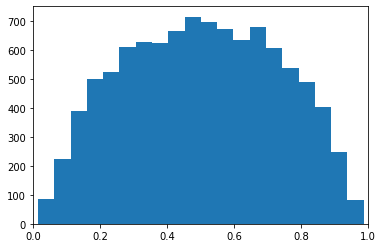

In [206]:
amount_of_vars = 4
intercept = 0
mean = 0
std = 3
n = 10000

t_noise_mean = 0
t_noise_std = 1

outcome_noise_mean = 0
outcome_noise_std = 1

num_of_experiments = 1000


variables, t_noise, o_noise = get_variables(mean_=mean, std_=std, n_=n, m_=amount_of_vars,
                                            treat_noise_mean_=t_noise_mean, treat_noise_std_=t_noise_std,
                                            outcome_noise_mean_=outcome_noise_mean, 
                                            outcome_noise_std_=outcome_noise_std
                                           )

coef = np.array([-0.1, .05, .2, -.05])
y_coef = np.array([5, 1.2, 3.6, 1.2, 1.2, 1])

variables = np.random.uniform(-4, 4, size=(n,amount_of_vars))

prop = expit_transform(coef, variables, noise=t_noise)

plt.hist(prop, bins=20);
plt.xlim([0, 1]);

# Prop model

## $\pi$ model

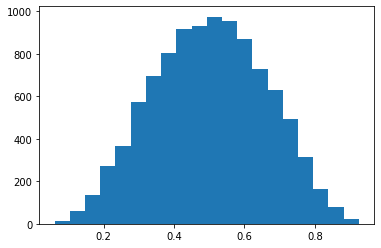

In [3]:
coef = np.array([-0.1, .05, .2, -.05])

exp = expit_transform(coef, variables)
plt.hist(exp, bins=20);

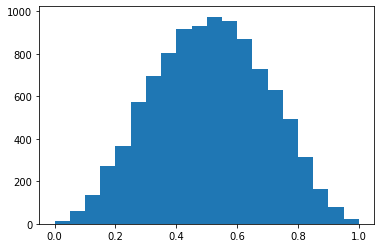

In [4]:

exp2 = (exp - exp.min()) / (exp.max() - exp.min())


plt.hist(exp2, bins=20);

## Treatment assigment

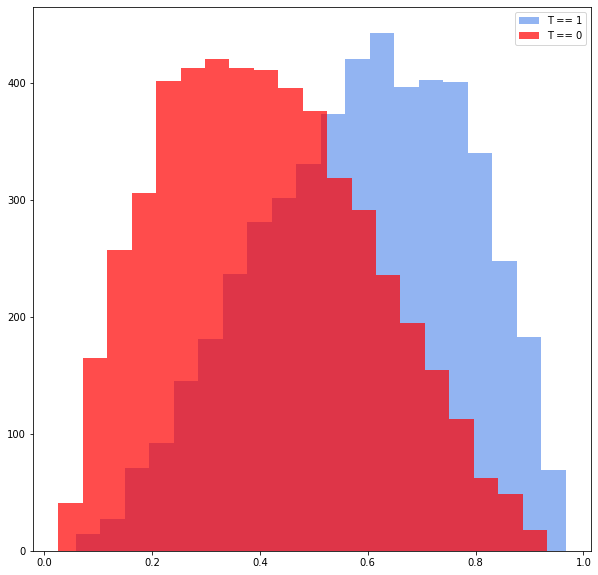

In [205]:



t = treatment_assigment(prop)

fig = plt.figure(figsize=(10, 10))

plt.hist(prop[t == 1], bins=20, color='cornflowerblue', alpha=0.7, label= 'T == 1');
plt.hist(prop[t == 0], bins=20, color='red', alpha=0.7, label= 'T == 0');

plt.legend();

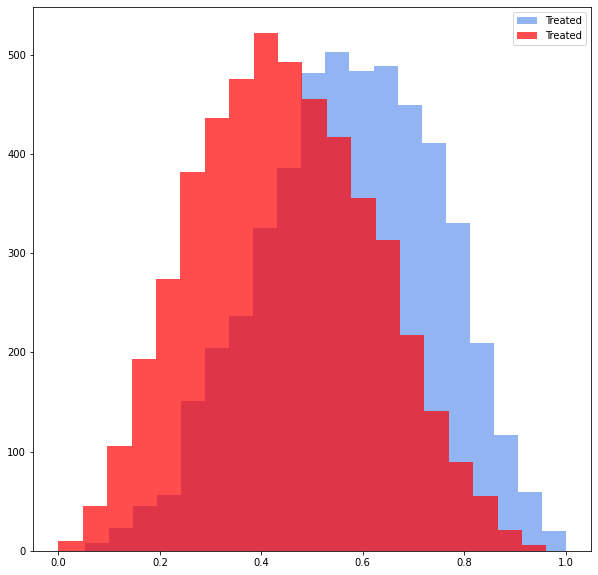

In [6]:
fig = plt.figure(figsize=(10, 10))

plt.hist(exp2[t == 1], bins=20, color='cornflowerblue', alpha=0.7, label= 'Treated');
plt.hist(exp2[t == 0], bins=20, color='red', alpha=0.7, label= 'Treated');

plt.legend();

In [33]:
import time

# time.strftime("%d_%m_%y_%H_%M")
cur_dir = os.path.abspath(os.curdir)

# os.path.abspath(
os.path.exists('.')
# )
# cur_dir

True

# Outcome model

In [28]:
y_coef = np.array([5, 1.2, 3.6, 1.2, 1.2, .0])

potential_outcomes_lst = utils.get_potential_outcomes(variables, y_coef, noise)

y = np.where(t == 1, potential_outcomes_lst[1], potential_outcomes_lst[0])

In [29]:
ate = (potential_outcomes_lst[1]  - potential_outcomes_lst[0]).mean()
ate_hat = utils.calc_ipw(y, t, exp)

In [30]:
ate - ate_hat

-0.21970675626153113

In [31]:
ate_hat / ate

1.0439413512523061

# Calibration Calculation

In [15]:

err_s = pd.Series(err)
brier_score = brier_score_loss(t, exp)
brier = pd.Series(brier_score, index=['brier'])

calib_res_df = err_s.describe(percentiles=[.1, .5, .9]).append(brier).to_frame().T



NameError: name 'err' is not defined

In [364]:
ate_hat = utils.calc_ipw(y, t, exp)
utils.generate_calib_error_df(t, exp).assign(ATE=ate_hat)

,count,mean,std,min,10%,50%,90%,max,brier,ATE
0,10000.0,0.019038,0.009125,0.000021,0.005447,0.020683,0.029102,0.052205,0.225334,4.509613


In [1014]:
ate_hat2 = utils.calc_ipw(y, t, exp3)
utils.generate_calib_error_df(t, exp3).assign(ATE=ate_hat2)

,count,mean,std,min,10%,50%,90%,max,brier,ATE
0,10000.0,0.01872,0.009135,0.000003,0.006628,0.019957,0.029867,0.045586,0.224086,4.477231


In [433]:
pd.Series(exp2).describe()

count    10000.000000
mean         0.501465
std          0.108217
min          0.147051
25%          0.426389
50%          0.501699
75%          0.576626
max          0.870538
dtype: float64

## to check calibration methods

In [466]:
# exp2 = expit(exp ** 2)

from scipy.special import logit
from scipy.stats import norm

exp2 = min_max_transform(logit(exp))

exp2 = min_max_transform(np.arctan(logit(exp)))

exp2 = min_max_transform(np.tanh(logit(exp)))

exp2 = utils.expit_transform(coef, variables, exp_scale=0.5)

exp2 = utils.expit_transform(coef, variables, exp_scale=5)


In [467]:
norm.ppf(logit(exp))

array([        nan,         nan, -0.05542964, ...,         nan,
               nan,  0.05772639])

In [13]:
exp2 = norm.cdf(logit(exp)*2)

In [5]:
expirments = {
    'identity': lambda x: x,
    'min_max': lambda x: min_max_transform(logit(x)),
    'min_max_arctan': lambda x: min_max_transform(np.arctan(logit(exp))),
    'min_max_tanh': lambda x: min_max_transform(np.tanh(logit(exp))),
    'scaled_expit_0.5': lambda x: expit(logit(exp)*0.5),
    'scaled_expit_5': lambda x: expit(logit(exp)*5),
    'probit': lambda x: norm.cdf(logit(exp)),
    'scaled_probit_0.5': lambda x: norm.cdf(logit(exp) * 2)
}

In [16]:
# exp2 = experiments['scaled_expit_0.25'](exp)

NameError: name 'experiments' is not defined

In [ ]:
rel_vars = get_

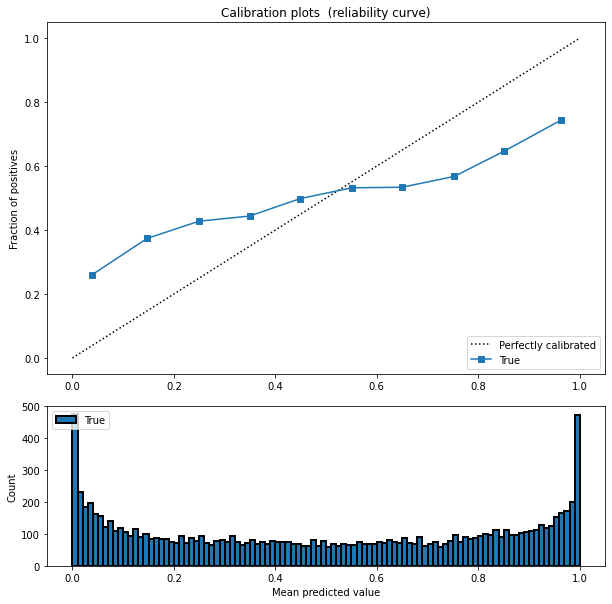

In [17]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")


fraction_of_positives, mean_predicted_value = \
    calibration_curve(t, exp2, n_bins=10)

name = "True"

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label=f"{name}")

ax2.hist(exp2, range=(0, 1), bins=100, label=name, histtype="bar", lw=2, alpha=1, fc=None, edgecolor='black')

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper left", ncol=2)

# full simulation

In [3]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import GridSearchCV

# tuned_parameters = [{'max_depth': [1,2, 3, 4, 5],
#                      'n_estimators': [1, 5, 10, 100]}]

rf_tuned_parameters = [{'max_depth': [1, 2, 3],
                     'n_estimators': [1, 5, 10, 100, 200, 400, 1000]}]

gb_tuned_parameters = [{'max_depth': [1, 2, 3, 4],
                        'learning_rate': [0.01, 0.05, 0.1],
                     'n_estimators': [1, 3, 5, 10, 15]}]

scores = 'neg_brier_score'

model_experiments = {
#     'GBT': GradientBoostingClassifier(random_state=42),
#     'rf': RandomForestClassifier(random_state=42, n_jobs=-1),
    'lr': LogisticRegression(random_state=42, penalty='none', n_jobs=-1),
    'GBT_cv': GridSearchCV(GradientBoostingClassifier(), gb_tuned_parameters, scoring=scores, n_jobs=-1),
    'rf_cv': GridSearchCV(RandomForestClassifier(), rf_tuned_parameters, scoring=scores, n_jobs=-1),
    'lr_l1': LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, solver='saga', penalty='l1', max_iter=1e4),
    'lr_l2': LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, solver='saga', penalty='l2', max_iter=1e4),
}

In [7]:
expirments = {
    'identity': lambda x: x,
    'min_max': lambda x: utils.min_max_transform(logit(x)),
    'min_max_arctan': lambda x: utils.min_max_transform(np.arctan(logit(x))),
    'min_max_tanh': lambda x: utils.min_max_transform(np.tanh(logit(x))),
    'scaled_expit_0.5': lambda x: expit(logit(x)*0.5),
    'scaled_expit_5': lambda x: expit(logit(x)*5),
    'probit': lambda x: norm.cdf(logit(x)),
    'scaled_probit_0.5': lambda x: norm.cdf(logit(x) * 2)
}

num_of_experiments = 10


calib_df = utils.generate_simulation(m=amount_of_vars, mean=mean, std=std, n=n, noise_mean=noise_mean,
                                     noise_std=noise_std, coef=coef, y_coef=y_coef, num_of_experiments=num_of_experiments, experiments=expirments)

# calib_df['type'] = 'true_prop'
calib_df

100%|██████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:39<00:00, 21.94s/it]


,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing
0,10000.0,0.015809,0.013633,9.085223e-07,0.002573,0.011801,0.035325,0.079679,0.225188,identity,identity_model,None,4.885000,0.347787
0,10000.0,0.045889,0.029975,2.343507e-06,0.007462,0.042857,0.088343,0.141761,0.226667,min_max,min_max_model,None,5.563981,0.357126
0,10000.0,0.039978,0.018786,1.429248e-05,0.010269,0.044890,0.059710,0.085350,0.229590,min_max_arctan,min_max_arctan_model,None,4.091206,0.311024
0,10000.0,0.076708,0.038743,4.776444e-05,0.019096,0.081079,0.124172,0.157896,0.237074,min_max_tanh,min_max_tanh_model,None,2.448115,0.284463
0,10000.0,0.075420,0.052378,2.673747e-06,0.013625,0.067063,0.148458,0.302731,0.230430,scaled_expit_0.5,0.5,None,5.703811,0.375038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10000.0,0.074177,0.036668,9.366318e-06,0.019128,0.078471,0.120737,0.141139,0.235431,min_max_tanh,min_max_tanh_model,None,2.917636,0.283673
9,10000.0,0.078106,0.054308,1.022679e-05,0.013153,0.070230,0.154966,0.290831,0.229842,scaled_expit_0.5,0.5,None,5.987163,0.370830
9,10000.0,0.193701,0.072455,6.675851e-05,0.075807,0.223438,0.259114,0.263570,0.282258,scaled_expit_5,5,None,-258.084577,0.190783
9,10000.0,0.044707,0.024098,1.322604e-05,0.010440,0.046337,0.076412,0.099027,0.229323,probit,probit_model,None,3.928667,0.304666


In [13]:
amount_of_vars = 4
intercept = 0
mean = 0
std = 3
n = 10000
p_x = 'normal'

noise_mean = 0
noise_std = 1

coef = np.array([-0.1, .05, .2, -.05])
y_coef = np.array([5, 1.2, 3.6, 1.2, 1.2, 1])
t_noise_mean = 0
t_noise_std = .5

outcome_noise_mean = 0
outcome_noise_std = .5

In [214]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression

rf_tuned_parameters = [{'max_depth': [1, 2, 3],
                     'n_estimators': [1, 5, 10, 100, 200, 400, 1000]}]

gb_tuned_parameters = [{'max_depth': [1, 2, 3, 4],
                        'learning_rate': [0.01, 0.05, 0.1],
                     'n_estimators': [1, 3, 5, 10, 15]}]

scores = 'neg_brier_score'

cv_inner = KFold(n_splits=10, shuffle=True, random_state=42)


model_experiments = {
    'lr': LogisticRegression(random_state=42, n_jobs=-1, penalty='none'),
    'lr_l1': LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, solver='saga', penalty='l1', max_iter=1e4),
    'lr_l2': LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, solver='saga', penalty='l2', max_iter=1e4),
    'GBT_cv': GridSearchCV(GradientBoostingClassifier(random_state=42), gb_tuned_parameters, scoring=scores, n_jobs=-1, cv=cv_inner),
    'rf_cv': GridSearchCV(RandomForestClassifier(random_state=42), rf_tuned_parameters, scoring=scores, n_jobs=-1, cv=cv_inner),
}

In [6]:
cur_dir = os.path.abspath(os.getcwd())

outputs_dir = os.path.join(cur_dir, "outputs")
run_name = 'sim_nest_norm3_noises_t05_o05'

cur_run_dir = os.path.join(outputs_dir, run_name)

In [216]:
os.makedirs(cur_run_dir)

In [217]:
scaling_range = [0.125, 0.25, 1/3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3]

experiments = utils.scaled_for_experiments(scaling_range)

experiments.update(model_experiments)

num_of_experiments = 10


calib_df = utils.generate_simulation(
    m=amount_of_vars, 
    mean=mean, std=std, n=n, 
    treatment_noise_mean=t_noise_mean,
    treatment_noise_std=t_noise_std,
    outcome_noise_mean=outcome_noise_mean,
    outcome_noise_std=outcome_noise_std,
    coef=coef,
    y_coef=y_coef,
    num_of_experiments=num_of_experiments,
    experiments=experiments,
    post_colab_func=utils.sigmoid_calib,
    save=True,
    nested_cv=True,
    save_dir=cur_run_dir,
    p_x=p_x
)

calib_df['ATE_error'] = (calib_df['ATE'] - y_coef[0]).pipe(lambda x: np.sqrt(x ** 2))
calib_df['ATE_error_l1'] = (calib_df['ATE'] - y_coef[0]).pipe(lambda x: np.abs(x))


calib_df

Saving to /Users/romgutman/PycharmProjects/Propensity/outputs/sim_nest_norm3_noises_t05_o05


100%|███████████████████████████████████████████████████████████████████████████████████████| 10/10 [1:38:01<00:00, 588.16s/it]


,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ATE_error,ATE_error_l1
0,10000.0,0.143369,0.100964,2.084271e-05,0.022032,0.128495,0.286353,0.586956,0.241069,scaled_expit_0.125,0.125,None,6.671276,0.361144,1.671276,1.671276
0,10000.0,0.017849,0.013045,2.012828e-06,0.003959,0.016051,0.036187,0.066472,0.217277,scaled_expit_0.125_calibrated,0.125,sigmoid_calib,4.856539,0.312415,0.143461,0.143461
0,10000.0,0.122486,0.085142,7.326419e-06,0.019090,0.110934,0.242946,0.481578,0.233673,scaled_expit_0.25,0.25,None,6.340275,0.357344,1.340275,1.340275
0,10000.0,0.017760,0.013215,5.911120e-06,0.003975,0.015677,0.036658,0.067297,0.217285,scaled_expit_0.25_calibrated,0.25,sigmoid_calib,4.861518,0.312395,0.138482,0.138482
0,10000.0,0.108863,0.074971,5.874641e-06,0.017012,0.099281,0.214668,0.414444,0.229602,scaled_expit_0.3333333333333333,0.333333,None,6.140921,0.353901,1.140921,1.140921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10000.0,0.018341,0.009023,1.288073e-06,0.005074,0.019610,0.027757,0.049282,0.227491,lr_l2_calibrated,lr_l2_model,sigmoid_calib,5.021220,0.363908,0.021220,0.021220
9,10000.0,0.037416,0.023382,1.639011e-05,0.007363,0.035455,0.072772,0.118752,0.230456,GBT_cv,GBT_cv_model,None,5.687130,0.377567,0.687130,0.687130
9,10000.0,0.015176,0.010402,6.232941e-08,0.002972,0.012723,0.031727,0.052566,0.229830,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,5.405519,0.368887,0.405519,0.405519
9,10000.0,0.045534,0.029459,1.101059e-05,0.009253,0.042758,0.090801,0.143354,0.230506,rf_cv,rf_cv_model,None,5.750339,0.373702,0.750339,0.750339


In [81]:
calib_df = pd.read_csv(os.path.join(cur_run_dir, os.pardir, "simulation_df.csv"), index_col=[0])
calib_df['ATE_error'] = (calib_df['ATE'] - y_coef[0]).pipe(lambda x: np.sqrt(x ** 2))
calib_df['ATE_error_l1'] = (calib_df['ATE'] - y_coef[0]).pipe(lambda x: np.abs(x))
# cur_run_dir = os.path.join(cur_run_dir, "outputs")
# calib_df

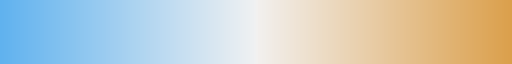

In [82]:
cm = sns.diverging_palette(240, 50, s=80, l=70,
                           n=calib_df['scale'].nunique(),
                           as_cmap=True, 
                           center='light'
                          )


# calib_df['scale'].apply(np.log).map(cm)

# sns.diverging_palette(240, 500, s=60, n=8)

cm

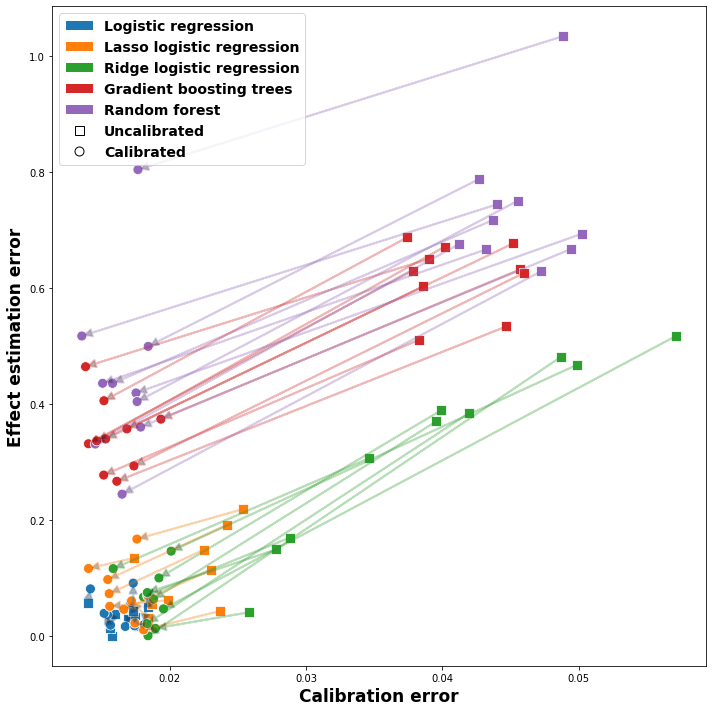

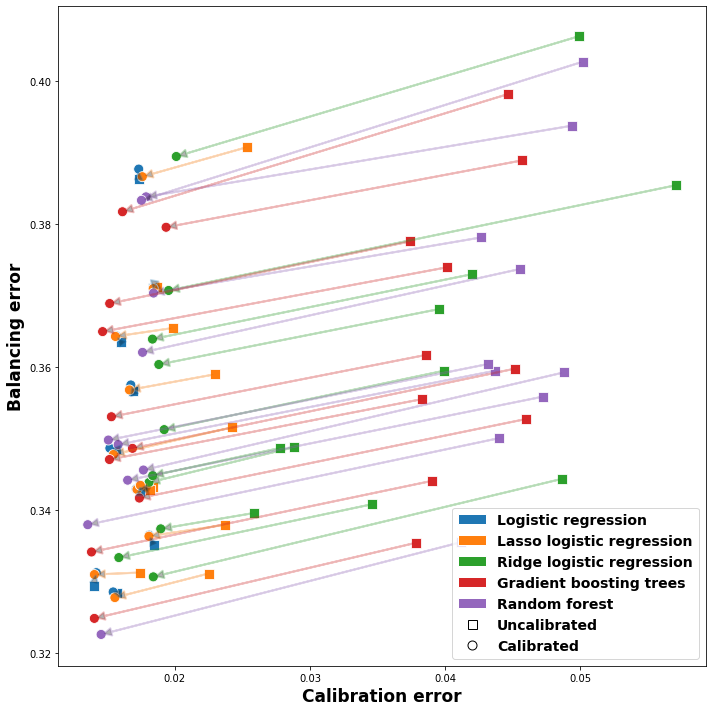

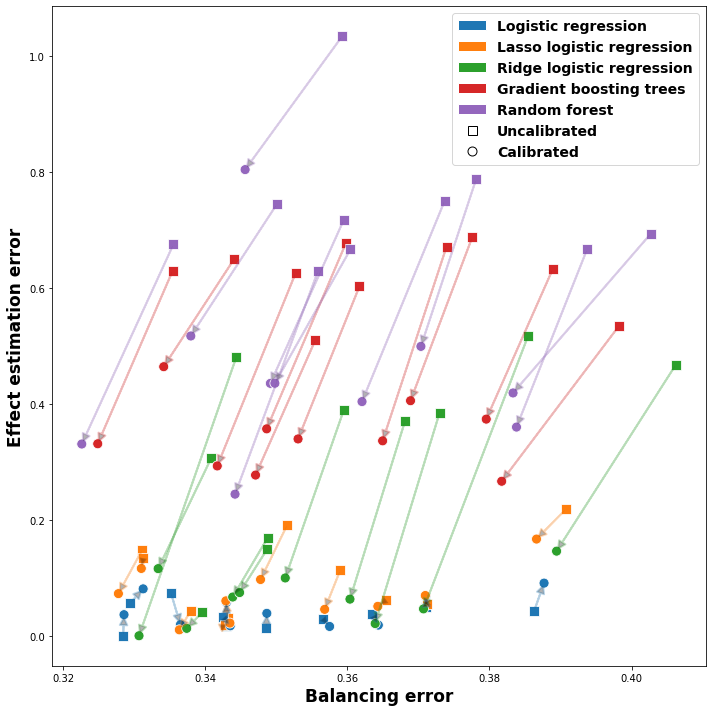

In [84]:
model_rows = pd.to_numeric(calib_df['scale'], errors='coerce').isna()
rel_models = calib_df[model_rows].copy()

force_names = ['Logistic Regression', 'Lasso Logistic Regression', 'Ridge Logistic Regression',
               "Gradient Boosting Trees", "Random Forest" ]

utils.plot_comp_plot(rel_models, x_label=r"Calibration error",
                     plot_legend=True, force_names=force_names, color_edges=True)
# plt.savefig('simulation_models_calibration_ate.jpg', dpi=400)
plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir, 'simulation_models_calibration_ate.jpg'), dpi=400)


utils.plot_comp_plot(rel_models, y_metric='Balancing', y_label='Balancing error',
                     x_label=r"Calibration error", 
                     plot_legend=True, force_names=force_names, color_edges=True)
# plt.savefig('simulation_models_calibration_balancing.jpg', dpi=400)
plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir, 'simulation_models_calibration_balancing.jpg'), dpi=400)


utils.plot_comp_plot(rel_models, metric='Balancing', x_label='Balancing error',
                     plot_legend=True, force_names=force_names, color_edges=True)
plt.tight_layout()
# plt.savefig('simulation_models_balancing_ate.jpg', dpi=400)
plt.savefig(os.path.join(cur_run_dir, 'simulation_models_balancing_ate.jpg'), dpi=400)


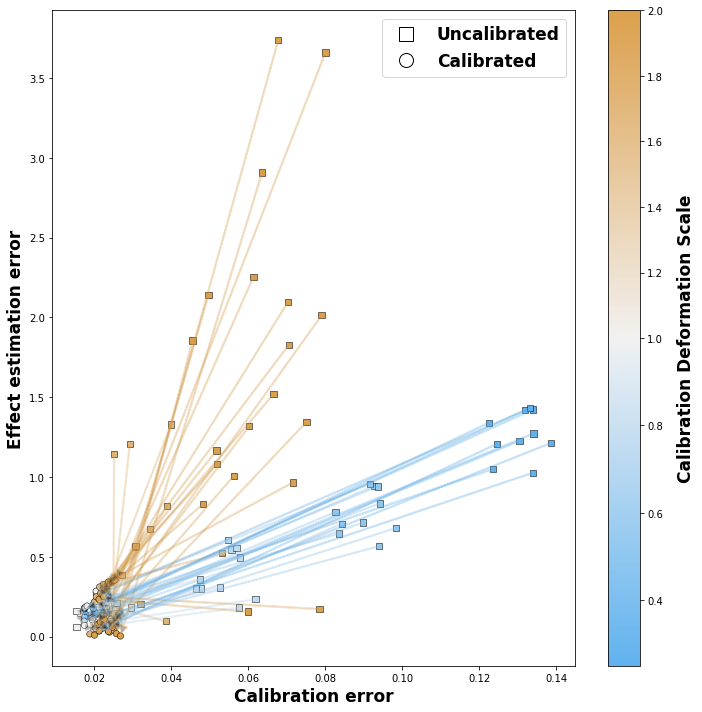

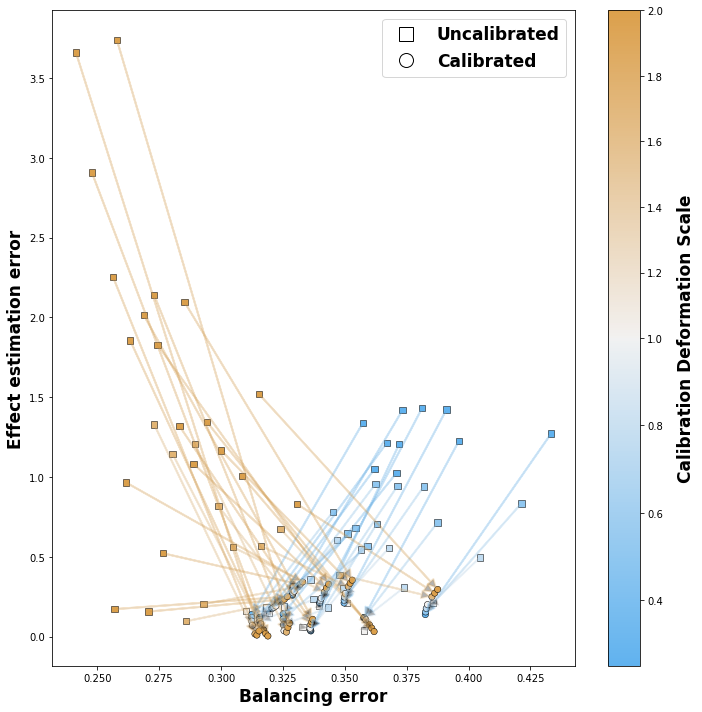

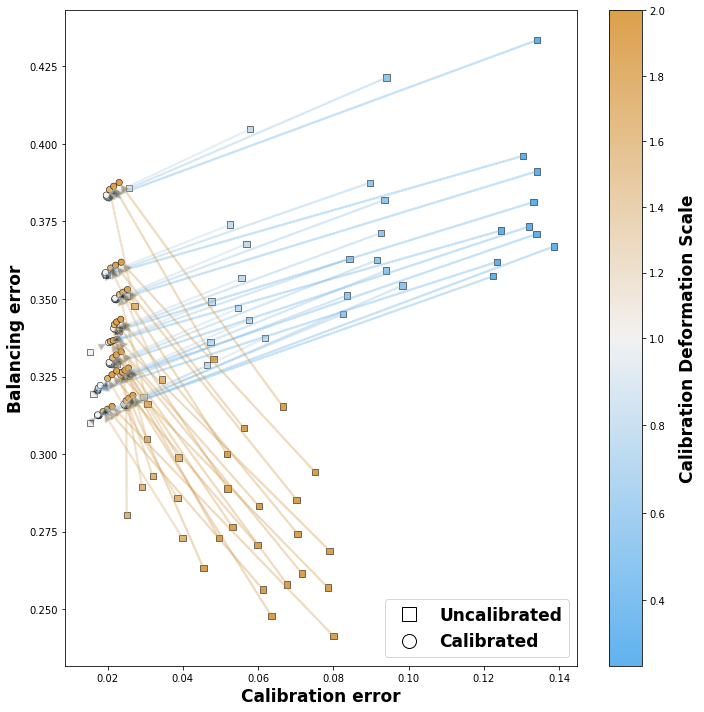

In [86]:
temp_scale_df = calib_df[~model_rows].copy()

temp_scale_df['scale'] = temp_scale_df['scale'].astype('float64')

utils.plot_comp_simulation_plot(temp_scale_df.query('scale in [0.25, 0.5, 0.75, 1, 1.5, 1.75, 2]'),
                                          cm=cm, color_edges=True)
plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir,'simulation_calibration_ate.jpg'), dpi=400)


utils.plot_comp_simulation_plot(temp_scale_df.query('scale in [0.25, 0.5, 0.75, 1, 1.5, 1.75, 2]'),
                          cm=cm, metric='Balancing', x_label='Balancing error', color_edges=True)
plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir,'simulation_balancing_ate.jpg'), dpi=400)

utils.plot_comp_simulation_plot(temp_scale_df.query('scale in [0.25, 0.5, 0.75, 1, 1.5, 1.75, 2]'),
                                cm=cm, y_metric='Balancing', y_label='Balancing error', color_edges=True)
plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir,'simulation_balancing_calibration.jpg'), dpi=400)

In [79]:
import pickle
with open(os.path.join(cur_run_dir, "models.pkl"), 'rb') as f:
    res_dict = pickle.load(f)

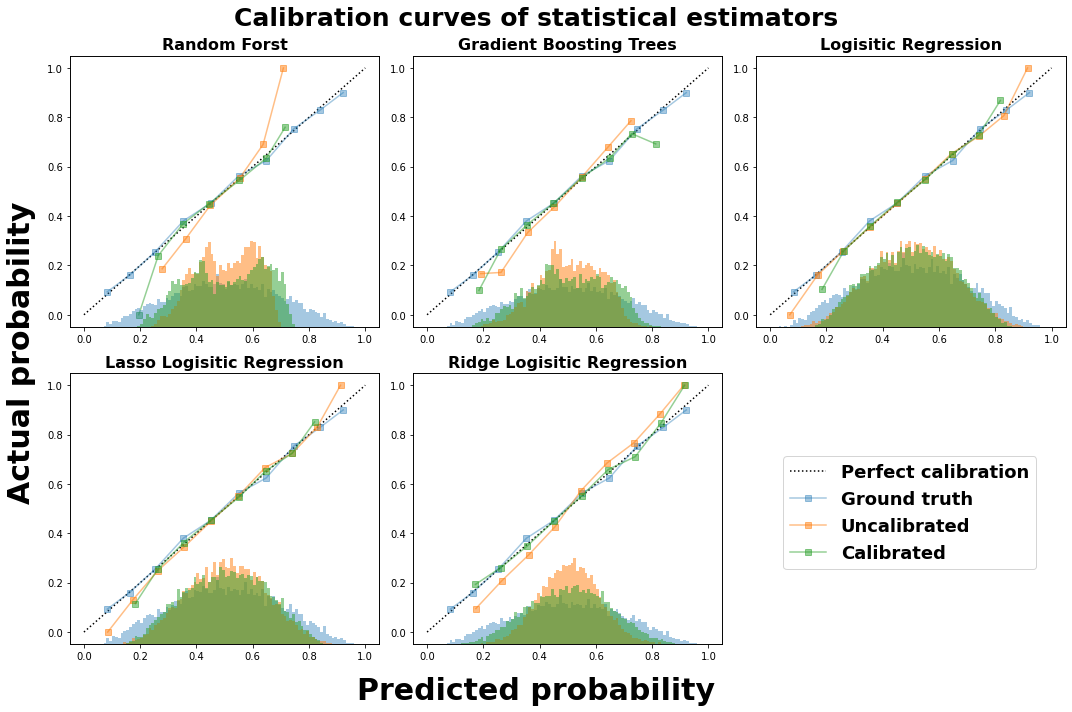

In [80]:
# fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
# axes[0][1] = 
fig, axes = plt.subplots(2,3, figsize=(15, 10))
utils.plot_calibration_curve(res_dict, 'rf_cv_model', ax1=axes[0][0], model_name="Random Forst")
utils.plot_calibration_curve(res_dict, 'GBT_cv_model', ax1=axes[0][1], model_name="Gradient Boosting Trees")
utils.plot_calibration_curve(res_dict, 'lr_model', ax1=axes[0][2], model_name="Logisitic Regression")
utils.plot_calibration_curve(res_dict, 'lr_l1_model', ax1=axes[1][0], model_name="Lasso Logisitic Regression")
utils.plot_calibration_curve(res_dict, 'lr_l2_model', ax1=axes[1][1], model_name="Ridge Logisitic Regression")
fig.supxlabel('Predicted probability', fontweight="bold", fontsize=30)
fig.supylabel('Actual probability', fontweight="bold", fontsize=30, x=0.01)
fig.suptitle("Calibration curves of statistical estimators", fontweight="bold", fontsize=25)


fig.legend(*axes[0][1].get_legend_handles_labels(), loc=(0.73, 0.2), prop={'weight': 'bold', 'size': 18})
for x in range(2):
    for y in range(3):
        if x == 1 and y == 2:
            continue
        axes[x][y].get_legend().remove()
axes[1][2].remove()
plt.tight_layout()

plt.savefig(os.path.join(cur_run_dir,'simulation_models_calibration_curves.jpg'), dpi=400)



In [73]:
# fig.__dict__

In [37]:
cur_run_dir

'/Users/romgutman/PycharmProjects/Propensity/outputs/sim_nest_norm3_noises_t05_o05/outputs'

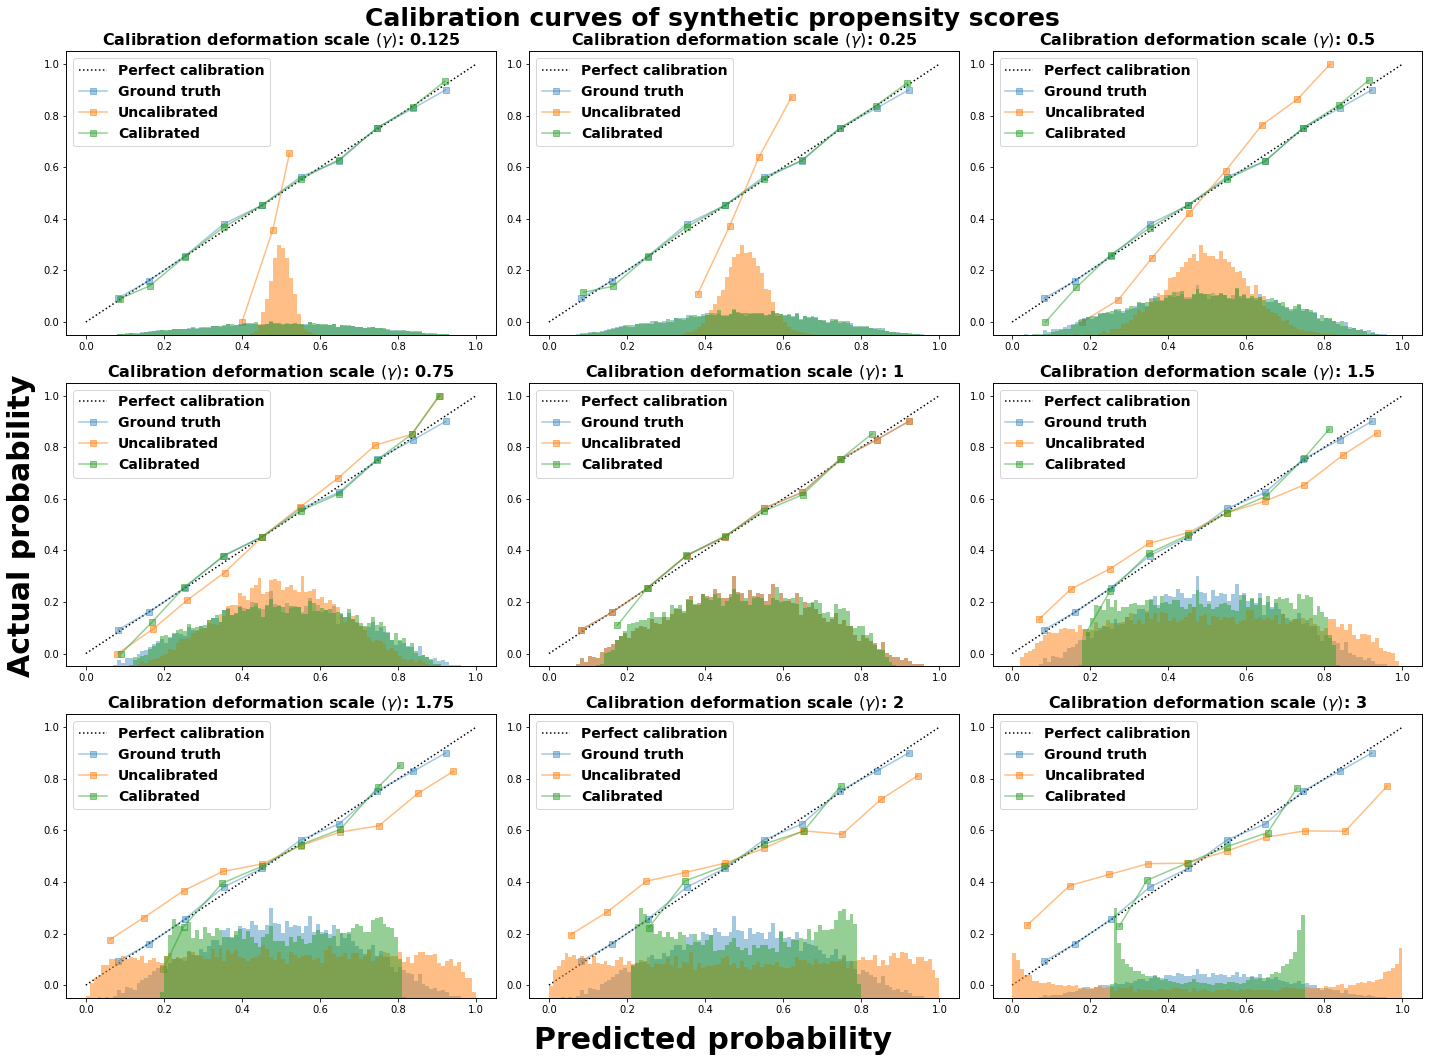

In [74]:
scales = [0.125, 0.25, 0.5, 0.75, 1, 1.5, 1.75, 2, 3]
row_limit = 3
fig, axes = plt.subplots(row_limit, row_limit, figsize=(20, 15))
i, j = 0, 0
for idx, scale in enumerate(scales):
    utils.plot_calibration_curve(res_dict,scale, ax1=axes[i][j])
    j += 1
    if j >= row_limit:
        i += 1
        j = 0
fig.supxlabel('Predicted probability', fontweight="bold", fontsize=30)
fig.supylabel('Actual probability', fontweight="bold", fontsize=30, x=0.01)
fig.suptitle("Calibration curves of synthetic propensity scores", fontweight="bold", fontsize=25)

plt.tight_layout()

plt.savefig(os.path.join(cur_run_dir,'simulation_deforming_calibration_curves.jpg'), dpi=400)
# fig.legend()

In [832]:
calib_df.to_csv('calib_df_before_smd.csv')

In [971]:
sns.diverging_palette(240, 18, s=80, l=50,sep=1,
                           n=calib_df['scale'].nunique(),
                      center='light'
#                            as_cmap=True, 
                          )

[(0.23010319520718325, 0.4887423024302338, 0.6690987262229071),
 (0.36965431696031037, 0.5783810431367898, 0.7244487514404696),
 (0.5147874835835626, 0.6716053334716081, 0.7820127776667346),
 (0.6571187253403653, 0.7630298459656776, 0.8384654791679281),
 (0.8022518919636176, 0.8562541363004958, 0.8960295053941931),
 (0.9502644313749016, 0.9458084295205358, 0.9453810551713931),
 (0.9210472029754666, 0.8188485935522556, 0.7979827102009093),
 (0.8897677231370339, 0.688549926764675, 0.6464475798844067),
 (0.8590921214775731, 0.5607667916300699, 0.497837970037506),
 (0.8278126416391404, 0.4304681248424893, 0.3463028397210033),
 (0.7977362187175703, 0.30518094523904643, 0.20059598364744313)]

In [99]:
model_rows = pd.to_numeric(calib_df['scale'], errors='coerce').isna()

In [496]:
model_rows = pd.to_numeric(calib_df['scale'], errors='coerce').isna()

In [100]:
calib_df['calibration_type_temp'] = calib_df['calibration_type'].fillna('None')

In [101]:
calib_df[~model_rows].sort_values('scale').groupby('type')['scale'].max().rank(method='first')

type
scaled_expit_0.125                             1.0
scaled_expit_0.125_calibrated                  2.0
scaled_expit_0.25                              3.0
scaled_expit_0.25_calibrated                   4.0
scaled_expit_0.3333333333333333                5.0
scaled_expit_0.3333333333333333_calibrated     6.0
scaled_expit_0.5                               7.0
scaled_expit_0.5_calibrated                    8.0
scaled_expit_0.75                              9.0
scaled_expit_0.75_calibrated                  10.0
scaled_expit_1                                11.0
scaled_expit_1.25                             13.0
scaled_expit_1.25_calibrated                  14.0
scaled_expit_1.5                              15.0
scaled_expit_1.5_calibrated                   16.0
scaled_expit_1.75                             17.0
scaled_expit_1.75_calibrated                  18.0
scaled_expit_1_calibrated                     12.0
scaled_expit_2                                19.0
scaled_expit_2_calibrated 

In [102]:
model_rows = pd.to_numeric(calib_df['scale'], errors='coerce').isna()
rel_models = calib_df[model_rows].copy()#.query('scale in ["lr_model", "GBT_cv_model", "rf_cv_model"]').copy()

In [103]:
rel_models

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ATE_error,ATE_error_l1,calibration_type_temp
0,10000.0,0.004646,0.002127,6.895515e-07,0.001077,0.005201,0.007082,0.021158,0.247473,lr,lr_model,None,5.004810,0.130236,0.004810,0.004810,None
0,10000.0,0.006449,0.003054,1.390975e-06,0.001462,0.007159,0.009631,0.016239,0.247463,lr_calibrated,lr_model,sigmoid_calib,5.022642,0.130235,0.022642,0.022642,sigmoid_calib
0,10000.0,0.005639,0.002570,5.152463e-07,0.001295,0.006634,0.008375,0.019362,0.247482,lr_l1,lr_l1_model,None,5.011619,0.130329,0.011619,0.011619,None
0,10000.0,0.006602,0.003180,5.084493e-07,0.001468,0.007433,0.009710,0.016791,0.247477,lr_l1_calibrated,lr_l1_model,sigmoid_calib,5.022000,0.130313,0.022000,0.022000,sigmoid_calib
0,10000.0,0.009221,0.005145,1.674715e-06,0.001902,0.009819,0.016004,0.026506,0.247492,lr_l2,lr_l2_model,None,5.041341,0.130620,0.041341,0.041341,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10000.0,0.022642,0.012393,9.033040e-06,0.005115,0.023382,0.036044,0.157204,0.248680,lr_l2_calibrated,lr_l2_model,sigmoid_calib,5.067434,0.103821,0.067434,0.067434,sigmoid_calib
9,10000.0,0.010768,0.004586,9.110726e-06,0.004662,0.011196,0.015931,0.023296,0.248261,GBT_cv,GBT_cv_model,None,5.058738,0.106034,0.058738,0.058738,None
9,10000.0,0.006028,0.002069,4.028793e-05,0.003179,0.006322,0.007648,0.011748,0.248227,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,5.043421,0.106458,0.043421,0.043421,sigmoid_calib
9,10000.0,0.009223,0.005253,2.844586e-06,0.003808,0.008469,0.014368,0.040122,0.247948,rf_cv,rf_cv_model,None,5.046212,0.106413,0.046212,0.046212,None


In [11]:
hue_s = calib_df.sort_values('scale').groupby('type')['scale'].max().apply(np.log).map(cm)

# sns.relplot(x='mean', y='ATE_error', data=calib_df, hue='type', col='calibration_type_temp', kind="scatter")


TypeError: '<' not supported between instances of 'str' and 'float'

Text(0, 0.5, 'ATE Error')

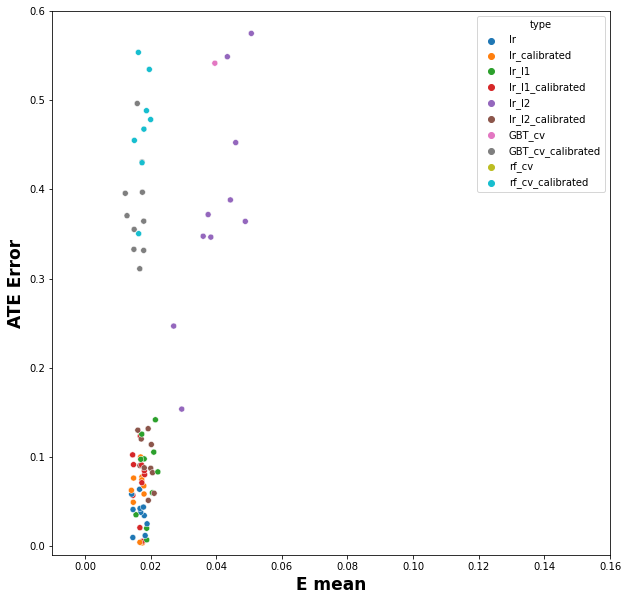

In [128]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='mean', y='ATE_error', data=calib_df[model_rows], #.loc[lambda df: df['type'].str.contains('cv')]
                hue='type')
plt.ylim(-0.01, 0.6)
plt.xlim(-.01, 0.16)

plt.xlabel('E mean', fontdict={'weight': 'bold', 'size':17})
plt.ylabel('ATE Error', fontdict={'weight': 'bold', 'size':17})


In [114]:
cur_run_dir

'/Users/romgutman/PycharmProjects/Propensity/outputs/sim_nest_new_run_noises_t05'

In [112]:
temp_scale_df = calib_df[~model_rows].copy()

temp_scale_df['scale'] = temp_scale_df['scale'].astype('float64')

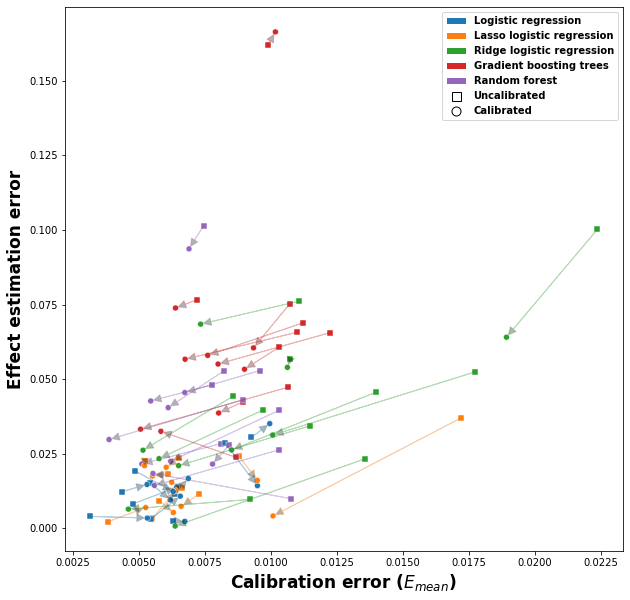

In [27]:
temp_ax = utils.plot_comp_plot(rel_models, x_label=r"Calibration error",
                               plot_legend=True, force_names=force_names, color_edges=True)


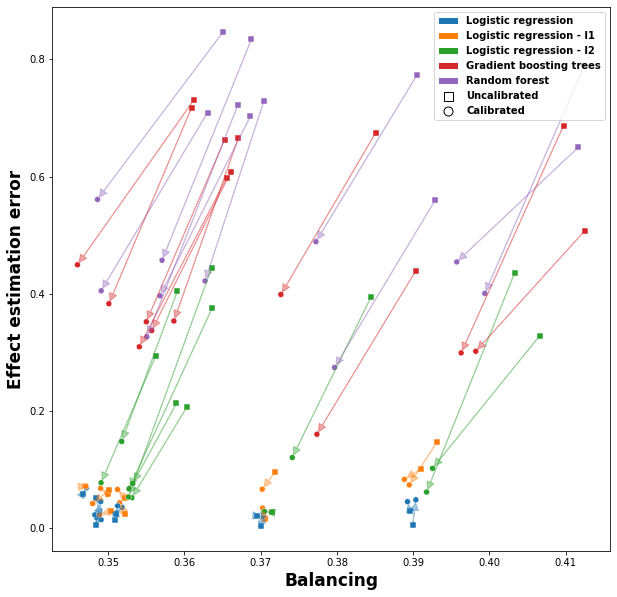

In [332]:
temp_ax = utils.plot_comp_plot(rel_models, metric='Balancing',
                         x_label='Balancing', plot_legend=True, force_names=force_names, color_edges=True)

In [301]:
orig_names = [obj._label for obj in temp_ax.get_children()[1:len(force_names) + 1]]
# force_names

temp_colors = temp_ax.get_children()[0]._facecolors[:len(orig_names)]


color_mapping = {name: color for name, color in zip(orig_names, temp_colors)}

In [19]:
def plot_comp_simulation_plot(big_df, metric='mean', y_metric='ATE_error', 
                              x_label='Calibration error', y_label='Effect estimation error', cm=None):
    fig = plt.figure(figsize=(10,10))
    if cm is not None:
        hue_norm, _, palette = utils.get_palette_for_values(cm, big_df)
        hue_order = big_df['scale'].sort_values().unique()
        palette = ListedColormap(palette, name='temp')
    else:
        hue_order = None
        palette = None
    for type_, marker in zip(['model', 'calibrated'], ['s', 'o']):
        mask = big_df['calibration_type'].isna() if type_ == 'model' else ~big_df['calibration_type'].isna()
        temp_df = big_df.loc[mask]
        legend = 'full' if type_ == 'model' else False
#         print(palette, hue_order)
#         print(type(palette))
        ax = sns.scatterplot(x=metric, y=y_metric, data=temp_df.sort_values('scale'),
                             hue='scale', marker=marker, legend=legend, s=40,
                            hue_order=hue_order, palette=palette, edgecolor='black')
    temp_df = big_df
#     print(temp_df['scale'].unique())
    plt.xlabel(x_label, fontdict={'weight': 'bold', 'size':17})
    plt.ylabel(y_label, fontdict={'weight': 'bold', 'size':17})

    arrows = utils.get_arrows(temp_df, calib_metric=metric, y_metric=y_metric)
    arrows.apply(utils.plot_arrow, ax=ax);
    legend_elements = [
                   Line2D([0], [0], marker='s', color='w', markeredgecolor='black',
                          lw=4, alpha=1, label='Uncalibrated', 
                          markerfacecolor='w', markersize=9),
                   Line2D([0], [0], marker='o', color='w', markeredgecolor='black',
                          lw=4, alpha=1, label='Calibrated',
                          markerfacecolor='w', markersize=9),
                  ]
    plt.legend(handles=legend_elements, prop={'weight':'bold', 'size':10})#, title='Deformation', )
    if cm is not None:
        sm = plt.cm.ScalarMappable(cmap=cm, norm=hue_norm)
        sm.set_array([])

        # Remove the legend and add a colorbar
        # ax.get_legend().remove()
        ax.figure.colorbar(sm)

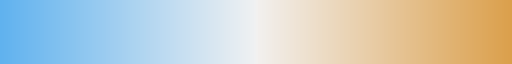

In [13]:
rel_scales = [0.25, 0.5, 0.75, 1, 1.5, 1.75, 2]

cm_temp = sns.diverging_palette(240, 50, s=80, l=70,
                                n=len(rel_scales),
                                as_cmap=True, 
                                center='light'
                               )

cm_temp

(-0.1, 0.5)

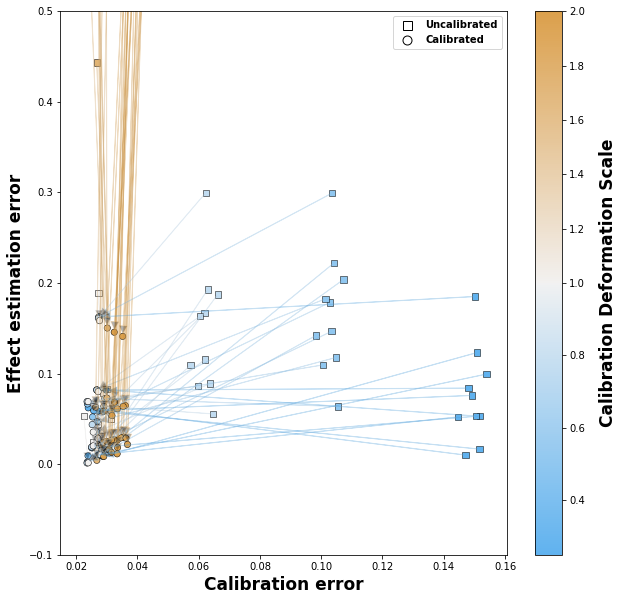

In [45]:
temp_ax = utils.plot_comp_simulation_plot(temp_scale_df.query('scale in [0.25, 0.5, 0.75, 1, 1.5, 1.75, 2]'),
                                          cm=cm, color_edges=True)
temp_ax.set_ylim([-0.1, 0.5])

In [246]:
scale_list = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

display(get_slopes(temp_scale_df.query('scale in @scale_list')))
display(get_slopes(temp_scale_df.query('scale in @scale_list'),x_metric='mean', y_metric='Balancing'))
display(get_slopes(temp_scale_df.query('scale in @scale_list'),x_metric='Balancing'))

0                                                              \
      count        mean          std          min        25%        50%   
scale                                                                     
0.25   10.0  -10.121407     1.194124   -11.475672 -11.044226 -10.231820   
0.50   10.0   -8.990449     1.440133   -10.543368 -10.100851  -9.481581   
0.75   10.0   -7.135320     2.404672    -9.642622  -9.262993  -7.701867   
1.00   10.0   21.334658    87.796794   -77.924842 -19.013218  -0.064509   
1.50   10.0 -711.973720  2097.324005 -6678.148981 -57.841704 -37.500500   
1.75   10.0  -37.204682    30.807073   -92.774181 -48.679146 -29.076452   
2.00   10.0  -39.681992    27.980037   -86.547391 -55.918982 -32.825758   

                              
             75%         max  
scale                         
0.25   -9.726705   -8.105510  
0.50   -7.950887   -6.552683  
0.75   -5.809133   -3.217497  
1.00   31.899746  251.008271  
1.50  -23.601043   10.141068  
1.75  -22.358113    2.001494  
2.00  -26.201898    1.390710

0                                                                \
      count       mean        std       min       25%       50%       75%   
scale                                                                       
0.25   10.0  -0.398055   0.038602 -0.452433 -0.426758 -0.396643 -0.371837   
0.50   10.0  -0.471518   0.038010 -0.526444 -0.499901 -0.466305 -0.447338   
0.75   10.0  -0.522958   0.036774 -0.580716 -0.551465 -0.515675 -0.493379   
1.00   10.0  -0.101218   1.195380 -1.615809 -0.577659 -0.316977  0.169849   
1.50   10.0  25.648861  69.213589  1.932511  2.225419  3.917605  5.382054   
1.75   10.0   1.827527   0.433633  1.378853  1.450987  1.809381  2.041628   
2.00   10.0   1.473750   0.229697  1.207230  1.272115  1.479515  1.617253   

                   
              max  
scale              
0.25    -0.345907  
0.50    -0.422324  
0.75    -0.477232  
1.00     2.728658  
1.50   222.576022  
1.75     2.765114  
2.00     1.932212

0                                                           \
      count        mean         std        min        25%        50%   
scale                                                                  
0.25   10.0  -25.727344    4.505254 -32.786578 -29.185002 -26.399027   
0.50   10.0  -19.243791    3.831130 -24.936807 -21.823248 -20.098434   
0.75   10.0  -13.802407    4.949620 -19.391116 -18.159843 -13.640987   
1.00   10.0  219.751320  704.961086 -91.989636 -36.462210  -0.973498   
1.50   10.0   14.313164   13.821390  -3.173238   4.573738  12.158543   
1.75   10.0   19.447380   13.971656  -1.408768  11.151095  17.083295   
2.00   10.0   26.152020   17.070659  -1.117674  17.577554  23.709603   

                               
             75%          max  
scale                          
0.25  -21.563700   -19.325534  
0.50  -15.975434   -13.404454  
0.75  -11.899514    -6.002794  
1.00   63.987485  2220.077715  
1.50   27.458273    32.242972  
1.75   30.907798    38.611273  
2.00   37.613377    52.327945

In [252]:
scale_list = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

temp_df_calib = pd.read_csv(os.path.join(cur_run_dir, "calib_df.csv"), index_col=[0])
display(get_slopes(temp_df_calib.query('scale in @scale_list')))
display(get_slopes(temp_df_calib.query('scale in @scale_list'),x_metric='mean', y_metric='Balancing'))
display(get_slopes(temp_df_calib.query('scale in @scale_list'),x_metric='Balancing'))

0                                                                \
        count        mean          std            min        25%        50%   
scale                                                                         
0.25   1000.0   -9.132074     2.648529     -13.797510 -10.830273  -9.947532   
0.50   1000.0   -7.450966     4.046374     -13.426388 -10.076078  -8.904497   
0.75   1000.0   -4.499782     6.734632     -13.619899  -9.309979  -7.408464   
1.00   1000.0   26.431071   515.365257   -2598.319925 -20.067570  -1.029932   
1.25   1000.0   17.573564    80.706931    -838.689810  -9.316369  19.422778   
1.50   1000.0 -244.468342  4281.692188 -133478.584463 -96.842879 -56.909310   
1.75   1000.0  -36.601279    24.553300    -126.875574 -52.427692 -36.466220   
2.00   1000.0  -40.221617    22.532813    -159.112957 -54.080719 -39.392606   

                                
             75%           max  
scale                           
0.25   -8.036636      6.569404  
0.50   -5.887275     12.542803  
0.75   -0.743728     14.400287  
1.00   23.095230  12406.890439  
1.25   35.985490    890.713558  
1.50  -18.408401   5483.132076  
1.75  -21.505434     34.213181  
2.00  -25.058078     14.895777

0                                                                  \
        count      mean         std         min       25%       50%       75%   
scale                                                                           
0.25   1000.0 -0.387668    0.039442   -0.505333 -0.414366 -0.387980 -0.360741   
0.50   1000.0 -0.462058    0.038950   -0.577067 -0.488097 -0.462869 -0.435041   
0.75   1000.0 -0.515879    0.039587   -0.643671 -0.541797 -0.515161 -0.487579   
1.00   1000.0 -0.427758    6.876689  -83.669521 -0.844372 -0.448532 -0.108024   
1.25   1000.0 -1.515134    5.452634  -31.659336 -2.090182 -1.447104 -1.098803   
1.50   1000.0  9.965264  150.486970 -504.495098  2.577642  3.452204  5.408427   
1.75   1000.0  1.838796    0.394724    1.136113  1.572076  1.760044  2.037702   
2.00   1000.0  1.473446    0.204832    1.035564  1.334984  1.447830  1.595927   

                    
               max  
scale               
0.25     -0.281462  
0.50     -0.357496  
0.75     -0.396935  
1.00     99.489338  
1.25    100.452957  
1.50   4642.752114  
1.75      3.967036  
2.00      2.311492

0                                                             \
        count       mean         std           min        25%        50%   
scale                                                                      
0.25   1000.0 -23.813614    7.351742    -44.479962 -28.824218 -25.288248   
0.50   1000.0 -16.251657    8.944915    -33.635152 -22.181522 -19.055271   
0.75   1000.0  -8.794737   13.209482    -30.546160 -17.960487 -13.907322   
1.00   1000.0 -27.752549  625.688766 -10843.089350 -34.411778  -0.754932   
1.25   1000.0   9.482579   17.097176    -30.076066  -6.060457  13.762916   
1.50   1000.0  14.689564   13.256040    -22.224989   6.127607  16.891200   
1.75   1000.0  20.050972   12.686888    -17.372723  11.875369  20.684028   
2.00   1000.0  27.403577   15.010264    -11.219191  17.274719  27.047280   

                               
             75%          max  
scale                          
0.25  -20.414554    14.750951  
0.50  -12.459240    24.008249  
0.75   -1.355354    32.978233  
1.00   43.042711  5944.304913  
1.25   23.511791    49.322988  
1.50   24.479329    49.768336  
1.75   28.634035    61.627315  
2.00   36.384031   109.230004

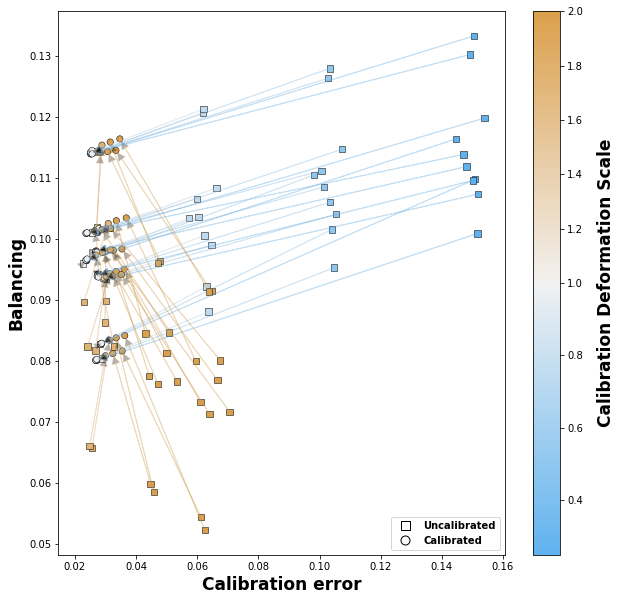

In [107]:
utils.plot_comp_simulation_plot(temp_scale_df.query('scale in [0.25, 0.5, 0.75, 1, 1.5, 1.75, 2]'),
                                cm=cm, y_metric='Balancing', y_label='Balancing', color_edges=True)
plt.savefig(os.path.join(cur_run_dir,'simulation_balancing_calibration.jpg'), dpi=400)
# plt.savefig(os.path.join(cur_run_dir,'simulation_deformed_as_frame.jpg'), dpi=400)

In [986]:
calib_df.to_csv('new_simulation.csv')

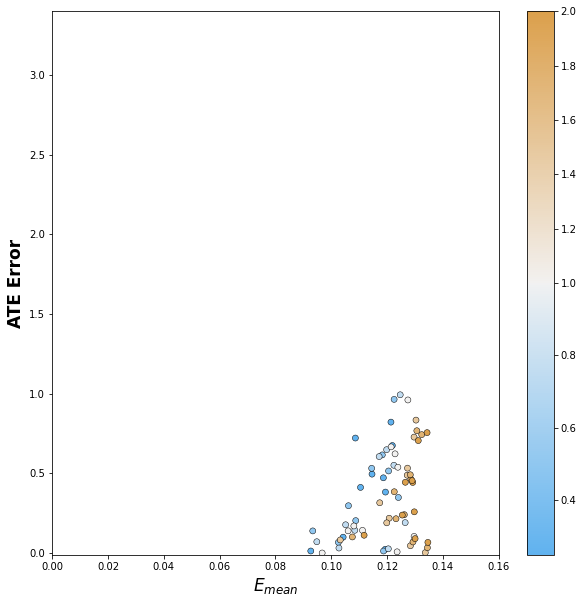

In [516]:
temp_df = temp_scale_df.loc[temp_scale_df['type'].str.contains('calibrated')].query('scale in @rel_scales')

utils.plot_calibration(df=temp_df,
                       calib_metric="mean",
                       calib_metric_label=r"$E_{mean}$",
                       upper_y_bound=3.4,
                       upper_x_bound=0.16,
                       lower_x_bound=0,
                       cm=cm
                      )


# arrows = get_arrows(temp_df, calib_metric='mean')

# arrows.apply(plot_arrow);

In [234]:
# temp_scale_df

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ATE_error,calibration_type_temp
0,10000.0,0.123181,0.088414,5.815613e-06,0.019450,0.108378,0.247947,0.490027,0.243725,scaled_expit_0.125,0.125000,None,6.614848,0.384521,1.614848,None
0,10000.0,0.015224,0.012687,6.902177e-07,0.000375,0.012665,0.033557,0.054377,0.226206,scaled_expit_0.125_calibrated,0.125000,sigmoid_calib,5.064775,0.348362,0.064775,sigmoid_calib
0,10000.0,0.105833,0.075430,2.516578e-05,0.016671,0.093722,0.212382,0.408252,0.238464,scaled_expit_0.25,0.250000,None,6.332904,0.381942,1.332904,None
0,10000.0,0.015133,0.012821,2.388666e-06,0.000279,0.012412,0.033747,0.055389,0.226207,scaled_expit_0.25_calibrated,0.250000,sigmoid_calib,5.067763,0.348380,0.067763,sigmoid_calib
0,10000.0,0.094431,0.066983,9.778124e-07,0.014773,0.084031,0.189031,0.355464,0.235524,scaled_expit_0.3333333333333333,0.333333,None,6.160203,0.379541,1.160203,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10000.0,0.017725,0.015630,2.638798e-06,0.001575,0.013603,0.041134,0.063285,0.222840,scaled_expit_1.75_calibrated,1.750000,sigmoid_calib,4.641811,0.391860,0.358189,sigmoid_calib
9,10000.0,0.063795,0.034256,3.774642e-05,0.014417,0.065511,0.108243,0.137241,0.231839,scaled_expit_2,2.000000,None,2.872927,0.332172,2.127073,None
9,10000.0,0.017995,0.016357,3.175828e-06,0.001407,0.014006,0.042494,0.061344,0.222982,scaled_expit_2_calibrated,2.000000,sigmoid_calib,4.657402,0.392346,0.342598,sigmoid_calib
9,10000.0,0.121283,0.055632,1.455225e-05,0.033096,0.132000,0.184981,0.204587,0.248517,scaled_expit_3,3.000000,None,-2.778857,0.282928,7.778857,None


In [241]:
# mask = 
temp_scale_df.loc[temp_scale_df['type'].str.contains('calibrated') &
                  temp_scale_df['scale'].isin(rel_scales),
                 "scale"].unique()

array([0.25, 0.5 , 0.75, 1.  , 1.5 , 1.75, 2.  ])

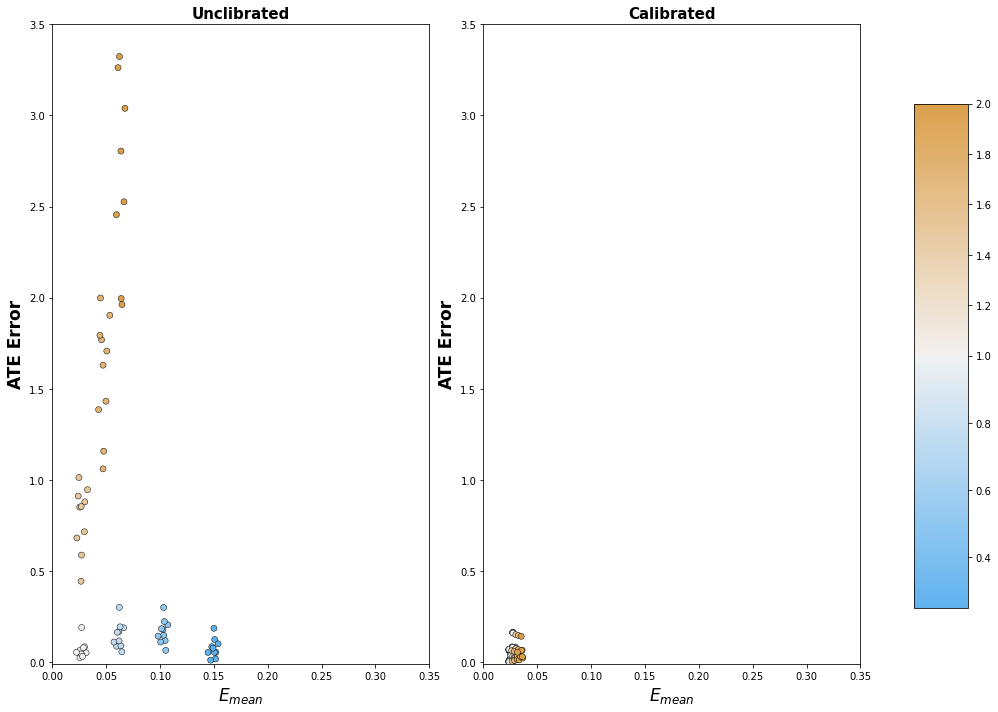

In [41]:
# temp_df = temp_scale_df.loc[temp_scale_df['type'].str.contains('calibrated')]

# utils.plot_calibration(df=temp_df,
#                        calib_metric="mean",
#                        calib_metric_label=r"$E_{mean}$",
#                        upper_y_bound=3.4,
#                        upper_x_bound=0.16,
#                        lower_x_bound=0,
#                        cm=cm
#                       )


# # arrows = get_arrows(temp_df, calib_metric='mean')

# # arrows.apply(plot_arrow);
fig, axes = plt.subplots(1, 2, figsize=(15,10))
mask = temp_scale_df['type'].str.contains('calibrated')
scale_mask = temp_scale_df['scale'].isin(rel_scales) 
for idx, type_ in enumerate(('unclibrated', 'calibrated')):
    if type_ == 'calibrated':
        temp_mask = mask
    else:
        temp_mask = ~mask
    temp_df = temp_scale_df.loc[temp_mask & scale_mask]

    axes[idx] = utils.plot_calibration(df=temp_df,
                                       calib_metric="mean",
                                       calib_metric_label=r"$E_{mean}$",
                                       upper_y_bound=3.5,
                                       upper_x_bound=0.35,
                                       lower_x_bound=0,
                                       cm=cm_temp,
                                       ax=axes[idx],
                                       return_ax=True
                                      )
    axes[idx].set_title(f"{type_.capitalize()}", fontdict={'size': 15, 'weight': 'bold'})

hue_norm, hue_order, palette = utils.get_palette_for_values(cm_temp, temp_df)
sm = plt.cm.ScalarMappable(cmap=cm_temp, norm=hue_norm)
sm.set_array([])

plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(sm, cax=cbar_ax)

plt.savefig(os.path.join(cur_run_dir,'simulation_deformed_as_frame_scaled.jpg'), dpi=400)

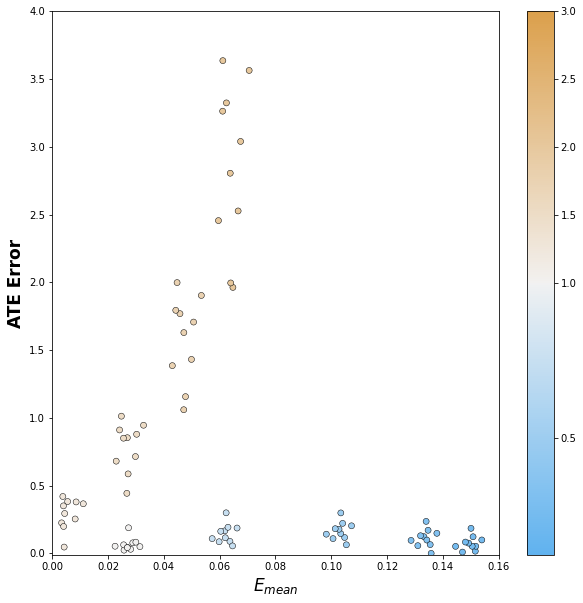

In [23]:
utils.plot_calibration(df=temp_scale_df.loc[~temp_scale_df['type'].str.contains('calibrated')],
                       calib_metric="mean",
                       calib_metric_label=r"$E_{mean}$",
                       upper_y_bound=4,
                       upper_x_bound=0.16,
                       cm=cm
                      )
# plt.legend(loc=2)

In [983]:
calib_df.query('scale == 1').sort_values('ATE_error')

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,ATE_error
9,10000.0,0.014619,0.015807,1.558731e-06,0.003278,0.005532,0.036849,0.095783,0.225954,scaled_expit_1_calibrated,1.0,sigmoid_calib,4.864907,0.135093
8,10000.0,0.019575,0.010491,1.279869e-05,0.004615,0.021130,0.029022,0.056227,0.224022,scaled_expit_1,1.0,None,4.809583,0.190417
8,10000.0,0.017401,0.012664,4.455075e-06,0.003129,0.015350,0.034263,0.067481,0.224046,scaled_expit_1_calibrated,1.0,sigmoid_calib,4.807543,0.192457
2,10000.0,0.016380,0.011937,8.814485e-06,0.004649,0.010541,0.035170,0.064429,0.225198,scaled_expit_1_calibrated,1.0,sigmoid_calib,5.213307,0.213307
7,10000.0,0.015703,0.013536,8.396054e-07,0.002080,0.011952,0.036323,0.062236,0.225509,scaled_expit_1_calibrated,1.0,sigmoid_calib,5.223533,0.223533
3,10000.0,0.016073,0.007844,1.290228e-05,0.004570,0.017783,0.024871,0.043677,0.225500,scaled_expit_1,1.0,None,5.223782,0.223782
2,10000.0,0.018110,0.009168,7.683204e-06,0.005570,0.018035,0.030610,0.052699,0.225074,scaled_expit_1,1.0,None,5.230960,0.230960
7,10000.0,0.015250,0.011137,6.367909e-06,0.002159,0.012916,0.032113,0.045475,0.225490,scaled_expit_1,1.0,None,5.240575,0.240575
9,10000.0,0.011527,0.014999,4.086120e-07,0.000690,0.004837,0.033689,0.093810,0.225777,scaled_expit_1,1.0,None,4.738197,0.261803
6,10000.0,0.019745,0.014656,3.269082e-06,0.006918,0.013927,0.044655,0.082325,0.224563,scaled_expit_1,1.0,None,5.263485,0.263485


In [326]:
def min_max_transform(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

calib_df_min_max = utilsx.generate_simulation(m=amount_of_vars, mean=mean, std=std, n=n, noise_mean=noise_mean,
                                     noise_std=noise_std, coef=coef, y_coef=y_coef, num_of_experiments=num_of_experiments, prop_func=min_max_transform)

calib_df_min_max['type'] = 'min_max'
calib_df_min_max

100%|██████████| 100/100 [06:21<00:00,  3.81s/it]


,count,mean,std,min,10%,50%,90%,max,brier,ATE
0,10000.0,0.007169,0.007015,1.599103e-06,0.001566,0.004726,0.017724,0.043717,0.225639,4.467960
1,10000.0,0.006022,0.005233,8.987875e-07,0.000831,0.003135,0.013660,0.023615,0.225555,5.003496
2,10000.0,0.020164,0.008352,1.067833e-05,0.005727,0.023684,0.027738,0.040211,0.223200,4.577017
3,10000.0,0.015027,0.009676,1.638426e-03,0.002397,0.014672,0.028179,0.034149,0.222593,4.980606
4,10000.0,0.004855,0.004112,1.769438e-06,0.001512,0.004029,0.010134,0.029789,0.225033,-20047.416128
...,...,...,...,...,...,...,...,...,...,...
95,10000.0,0.004993,0.003806,9.376297e-07,0.000846,0.003973,0.010508,0.032536,0.224681,4.701124
96,10000.0,0.012173,0.006196,6.448165e-07,0.004817,0.012120,0.019435,0.049328,0.226774,4.213132
97,10000.0,0.012093,0.004361,1.022760e-05,0.004477,0.014258,0.016088,0.016408,0.220701,4.874188
98,10000.0,0.013602,0.006965,3.675677e-05,0.006198,0.011822,0.024093,0.024865,0.224073,4.576941


# experiments  section

In [337]:
calibs = pd.concat([calib_df, calib_df_min_max])

In [644]:
from sklearn.calibration import _sigmoid_calibration

a, b = _sigmoid_calibration(experiments['scaled_expit_3'](exp), t)


# exp[None,:]

In [645]:
exp2 = expit(-(a * experiments['scaled_expit_3'](exp) + b))

In [635]:
a

-4.338190621905144

In [648]:
scaling_range = [0.25, 1/3, 0.5, 0.75, 1, 1.5, 2, 3]

experiments = utils.scaled_for_experiments(scaling_range)

In [682]:
float(calib_df['type'].unique()[0].split('_')[-1])

0.25

In [170]:
roc_auc_score(res_dict['t'], res_dict['models']['GBT_cv_model']['corrected'])

NameError: name 'roc_auc_score' is not defined

In [386]:
# res_dict['models']

In [7]:
res_dict

{'t': array([0, 1, 0, ..., 1, 0, 1]),
 'prop': array([0.06083782, 0.13658521, 0.2439274 , ..., 0.84973761, 0.23261787,
        0.54739841]),
 'models': {0.125: {'deformed': array([0.41530017, 0.44263044, 0.4647067 , ..., 0.55393139, 0.46276942,
          0.50594237]),
   'corrected': array([0.06153873, 0.13573106, 0.2412682 , ..., 0.84625503, 0.23011763,
          0.54289129])},
  0.25: {'deformed': array([0.33532586, 0.38675179, 0.42976336, ..., 0.6066223 , 0.42594941,
          0.51188305]),
   'corrected': array([0.06127894, 0.13211953, 0.23610472, ..., 0.85041408, 0.22496687,
          0.54437225])},
  0.3333333333333333: {'deformed': array([0.28653784, 0.35099946, 0.4068292 , ..., 0.64049538, 0.40182598,
          0.51584175]),
   'corrected': array([0.0610771 , 0.1286797 , 0.23101967, ..., 0.8543993 , 0.21990835,
          0.54587351])},
  0.5: {'deformed': array([0.20288038, 0.284556  , 0.36224501, ..., 0.70396945, 0.35507754,
          0.52375269]),
   'corrected': array([0.060

In [ ]:
utils.plo

In [417]:
"deformed".replace("corrected", "Calibrated")

'deformed'

In [396]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [226]:
res_dict['models']

{0.125: {'deformed': array([0.49998443, 0.45948253, 0.50401966, ..., 0.51845675, 0.49199749,
         0.51440538]),
  'corrected': array([0.50128005, 0.22296445, 0.53245844, ..., 0.64034601, 0.43977204,
         0.61098876])},
 0.25: {'deformed': array([0.49996885, 0.41949372, 0.50803879, ..., 0.53686327, 0.48399908,
         0.52878687]),
  'corrected': array([0.501265  , 0.22335298, 0.53258824, ..., 0.64077384, 0.43948537,
         0.61138694])},
 0.3333333333333333: {'deformed': array([0.49995847, 0.39337772, 0.51071767, ..., 0.54908181, 0.47867111,
         0.53834952]),
  'corrected': array([0.50124953, 0.22376064, 0.532721  , ..., 0.641208  , 0.43919224,
         0.61179252])},
 0.5: {'deformed': array([0.49993771, 0.34305622, 0.51607343, ..., 0.57332797, 0.46803091,
         0.55738353]),
  'corrected': array([0.50120617, 0.22494773, 0.53309068, ..., 0.64239818, 0.43837683,
         0.61291232])},
 0.75: {'deformed': array([0.49990656, 0.2739733 , 0.52409977, ..., 0.60901255, 0.

In [1026]:
calib_df.to_csv('30_06_df.csv', index_label='simulation_run')

In [800]:
calib_df = pd.read_csv('models/30_06_df.csv')

,simulation_run,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,ATE_error
0,0,10000.0,0.123582,0.086162,1.938345e-05,0.021828,0.108951,0.243693,0.544065,0.243700,scaled_expit_0.125,0.125000,NaN,6.943086,1.943086
1,0,10000.0,0.016233,0.010315,1.674020e-06,0.004753,0.012716,0.031433,0.057248,0.226309,scaled_expit_0.125_calibrated,0.125000,sigmoid_calib,5.316181,0.316181
2,0,10000.0,0.106095,0.073173,3.697534e-05,0.019207,0.094022,0.208305,0.452002,0.238425,scaled_expit_0.25,0.250000,NaN,6.649197,1.649197
3,0,10000.0,0.016173,0.010432,4.121674e-06,0.004739,0.012536,0.031608,0.057709,0.226313,scaled_expit_0.25_calibrated,0.250000,sigmoid_calib,5.317492,0.317492
4,0,10000.0,0.094605,0.064718,1.828324e-05,0.017367,0.084136,0.184805,0.392215,0.235483,scaled_expit_0.3333333333333333,0.333333,NaN,6.468408,1.468408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,9,10000.0,0.016235,0.016880,2.754845e-06,0.001066,0.008914,0.041377,0.080353,0.226466,scaled_expit_1.75_calibrated,1.750000,sigmoid_calib,4.920879,0.079121
216,9,10000.0,0.078631,0.038163,2.440766e-06,0.020637,0.084288,0.124595,0.159960,0.237890,scaled_expit_2,2.000000,NaN,2.175019,2.824981
217,9,10000.0,0.017043,0.016795,1.147093e-06,0.001549,0.010205,0.042177,0.074751,0.226690,scaled_expit_2_calibrated,2.000000,sigmoid_calib,4.941473,0.058527
218,9,10000.0,0.137239,0.060551,1.513836e-05,0.040676,0.150166,0.205198,0.228970,0.256833,scaled_expit_3,3.000000,NaN,-9.394135,14.394135


In [48]:
def get_points(df, calib_metric, y_metric='ATE_error'):
    if df.shape[0] != 2: 
        print('warning!')
        display(df)
        raise ValueError('Bad df')
    x_y_orig = df.loc[df['calibration_type'].isna(), [calib_metric, y_metric]]
    x_y_calib = df.loc[~df['calibration_type'].isna(), [calib_metric, y_metric]]
    return (x_y_orig[calib_metric].iloc[0],
            x_y_orig[y_metric].iloc[0],
            (x_y_calib[calib_metric].iloc[0] - x_y_orig[calib_metric].iloc[0]),
            (x_y_calib[y_metric].iloc[0] - x_y_orig[y_metric].iloc[0]))

def get_arrows(df, calib_metric, y_metric='ATE_error'):

    gb = df.reset_index().groupby('index')

    arrows = []
    for g in gb.groups:
        arrows.append(gb.get_group(g).groupby('scale').apply(get_points, calib_metric, y_metric))

    arrows = pd.concat(arrows)
    return arrows


def plot_arrow(values):
    plt.arrow(*values, length_includes_head=True, lw=0.1, alpha=0.4, ls='--');

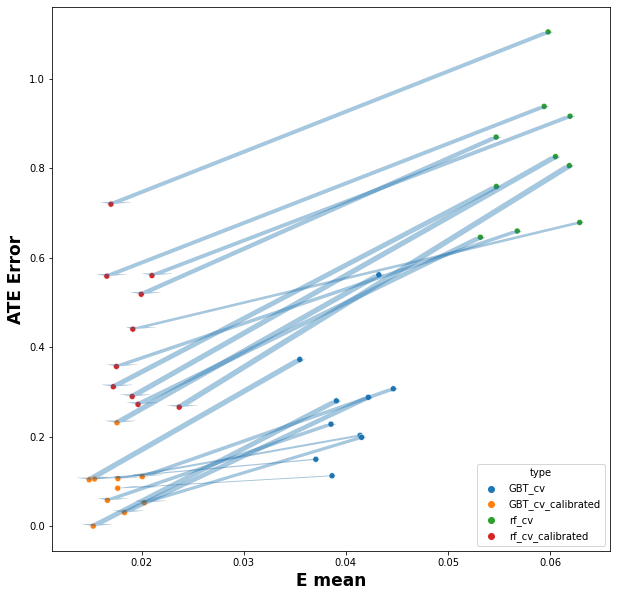

In [49]:
plt.figure(figsize=(10,10))
temp_df = calib_df[model_rows].loc[lambda df: df['type'].str.contains('cv')]
sns.scatterplot(x='mean', y='ATE_error', data=temp_df, hue='type')
# plt.ylim(-0.01, 0.6)
# plt.xlim(-.01, 0.16)

plt.xlabel('E mean', fontdict={'weight': 'bold', 'size':17})
plt.ylabel('ATE Error', fontdict={'weight': 'bold', 'size':17})

arrows = get_arrows(temp_df, calib_metric='mean')

arrows.apply(plot_arrow);

/Users/romg/opt/anaconda3/lib/python3.8/site-packages/causallib/datasets/data_loader.py:135: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  y = y.lookup(y.index, a)  # Choose the outcome based on the treatment assignment


In [286]:
res_df = pd.read_csv('var.csv', index_col=[0])


,z,y,y.0,y.1,mu.0,mu.1,e
1,0,3.157727,3.157727,7.441336,3.890563,5.716108,0.451172
2,0,4.281244,4.281244,8.937312,5.870844,8.913574,0.403919
3,0,7.621447,7.621447,8.919930,7.006040,10.022676,0.517100
4,1,4.015639,-1.828240,4.015639,-1.046089,2.952779,0.388094
5,0,-0.240268,-0.240268,5.296278,-0.478072,6.246069,0.394039
...,...,...,...,...,...,...,...
4798,1,6.861145,2.868927,6.861145,3.468946,5.867435,0.323233
4799,1,9.796457,4.512699,9.796457,4.827529,9.988942,0.398313
4800,1,10.910222,3.807379,10.910222,4.183918,9.469441,0.250085
4801,1,12.444005,5.168389,12.444005,4.684806,11.919826,0.270711


# synthetic data

In [15]:
from causallib.datasets import load_acic16


x_acic = load_acic16(instance=1, raw=False)['X']

/Users/romg/opt/anaconda3/lib/python3.8/site-packages/causallib/datasets/data_loader.py:135: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  y = y.lookup(y.index, a)  # Choose the outcome based on the treatment assignment


In [50]:
from glob import glob
import re

reg = r'(?<=var)\d{1,2}_\d{1,2}'

def get_expr_id(s, r_pattern):
    return re.findall(r_pattern, s)[0]

cur_dir = os.path.abspath(os.getcwd())
data_dir = os.path.join(cur_dir, "data")
pattern = 'var*_*.csv'

target_files_list = glob(os.path.join(data_dir, pattern))



In [51]:
rel_target_list = sorted([f for f in target_files_list if get_expr_id(f, reg).split('_')[0] == '42'])

In [52]:
rel_target_list

['/Users/romgutman/PycharmProjects/Propensity/data/var42_1.csv',
 '/Users/romgutman/PycharmProjects/Propensity/data/var42_2.csv',
 '/Users/romgutman/PycharmProjects/Propensity/data/var42_3.csv',
 '/Users/romgutman/PycharmProjects/Propensity/data/var42_4.csv',
 '/Users/romgutman/PycharmProjects/Propensity/data/var42_5.csv']

### todo:

- parameters
- pipeline


In [53]:


rf_tuned_parameters = [{'max_depth': [5, 10, 20, 30],
                     'n_estimators': [50, 100, 200, 400, 1000]}]

gb_tuned_parameters = [{'max_depth': [1, 2, 3, 6],
                        'learning_rate': [0.01, 0.05, 0.1],
                     'n_estimators': [30, 50, 100, 250, 500, 1000]}]

scores = 'neg_brier_score'

cv_inner = KFold(n_splits=10, shuffle=True, random_state=42)


model_experiments = {
    'lr': LogisticRegression(random_state=42, n_jobs=-1, penalty='none'),
    'lr_l1': LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, solver='saga', penalty='l1', max_iter=1e4),
    'lr_l2': LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, solver='saga', penalty='l2', max_iter=1e4),
    'GBT_cv': GridSearchCV(GradientBoostingClassifier(random_state=42), gb_tuned_parameters, scoring=scores, n_jobs=-1, cv=cv_inner),
    'rf_cv': GridSearchCV(RandomForestClassifier(random_state=42, oob_score=True), rf_tuned_parameters, scoring=scores, n_jobs=-1, cv=cv_inner),
    'identity': None
}

In [565]:
df_42_nested_sig_test.to_csv('test_df_42_nested_sig.csv')

In [1049]:
from copy import deepcopy
from tqdm import tqdm

def run_multiple_experiments(experiment_files, model_experiments):
    df_list = []
    for instance in tqdm(experiment_files): 
        models = deepcopy(model_experiments)
        id_ = get_expr_id(instance, reg)
        instance_df = pd.read_csv(instance, index_col=[0]).reset_index(drop=True)
        po = instance_df[['y.0', 'y.1']].copy()
        po.columns = [0, 1]
        e = instance_df['e'].copy()
        c_df_1 = utils.run_synthetic_experiments(var = x_acic,
                                t=instance_df['z'],
                                e=e,
                                potential_outcomes=po,
                                experiments=models,
                                post_colab_func=utils.sigmoid_calib,
                                save=True, save_name=f'models_test_new/acic{id_}_new_sig.pkl',id_=id_,
                                nested_cv=False
                               )
        ate = (po[1] - po[0]).mean()
        c_df_1['ATE_error'] = (c_df_1['ATE'] - ate).pipe(lambda x: np.sqrt(x ** 2))
        df_list.append(c_df_1)
    return pd.concat(df_list)


df_42_nested_sig_new = run_multiple_experiments(rel_target_list, model_experiments)

  0%|          | 0/5 [00:00<?, ?it/s]/Users/romg/PycharmProjects/Propensity/utils.py:246: UserWarning: for experiment identity, predicting identity
  warnings.warn(f'for experiment {expr}, predicting identity')
 20%|██        | 1/5 [1:03:27<4:13:51, 3807.94s/it]/Users/romg/PycharmProjects/Propensity/utils.py:246: UserWarning: for experiment identity, predicting identity
  warnings.warn(f'for experiment {expr}, predicting identity')
 40%|████      | 2/5 [2:07:54<3:12:07, 3842.41s/it]/Users/romg/PycharmProjects/Propensity/utils.py:246: UserWarning: for experiment identity, predicting identity
  warnings.warn(f'for experiment {expr}, predicting identity')
 60%|██████    | 3/5 [3:50:46<2:43:32, 4906.13s/it]/Users/romg/PycharmProjects/Propensity/utils.py:246: UserWarning: for experiment identity, predicting identity
  warnings.warn(f'for experiment {expr}, predicting identity')
 80%|████████  | 4/5 [6:01:33<1:41:07, 6067.01s/it]/Users/romg/PycharmProjects/Propensity/utils.py:246: UserWarnin

In [1042]:
df_42_nested_sig_lr.to_csv('nested_sig_with_lr.csv')

In [479]:
df_42_nested_experiments_sig.to_csv('nested_acis_42_sig.csv')

In [471]:
instance = rel_target_list[1]
id_ = get_expr_id(instance, reg)
instance_df = pd.read_csv(instance, index_col=[0])
po = instance_df[['y.0', 'y.1']].copy()
po.columns = [0, 1]
e = instance_df['e'].copy()


In [472]:
get_expr_id(instance, reg)

'42_2'

In [473]:
c_df_1 = utils.run_synthetic_experiments(var = x_acic,
                                t=instance_df['z'],
                                e=e,
                                potential_outcomes=po,
                                experiments=deepcopy(model_experiments),
                                post_colab_func=utils.sigmoid_calib,
                                save=False, save_name=f'acic{id_}_sig.pkl',id_=id_, nested_cv=False
                               )

/Users/romg/PycharmProjects/Propensity/utils.py:236: UserWarning: for experiment identity, predicting identity
  if save:


In [474]:
ate = (po[1] - po[0]).mean()

c_df_1['ATE_error'] = (c_df_1['ATE'] - ate).pipe(lambda x: np.sqrt(x ** 2))

In [1078]:
df_42_nested_sig_lr.query('scale == "rf_cv_model"')

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ATE_error
42_1,4802.0,0.124322,0.086252,5.928428e-05,0.027367,0.113334,0.240145,0.556343,0.218033,rf_cv,rf_cv_model,None,2.903261,0.085169,0.342150
42_1,4802.0,0.056271,0.038655,1.623310e-05,0.018546,0.047518,0.111769,0.223816,0.205875,rf_cv_calibrated,rf_cv_model,sigmoid_calib,2.819054,0.077568,0.257943
42_2,4802.0,0.082787,0.069482,1.356538e-05,0.012854,0.066915,0.166953,0.544714,0.226713,rf_cv,rf_cv_model,None,3.787589,0.121411,0.221794
42_2,4802.0,0.033872,0.033198,1.596307e-06,0.004588,0.020479,0.077551,0.222837,0.220307,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.607027,0.073899,0.041232
42_3,4802.0,0.090312,0.069983,5.979360e-05,0.014738,0.070455,0.190166,0.346784,0.224832,rf_cv,rf_cv_model,None,3.443967,0.124210,0.432946
42_3,4802.0,0.032690,0.022352,4.313785e-06,0.006748,0.028967,0.069933,0.083384,0.216036,rf_cv_calibrated,rf_cv_model,sigmoid_calib,2.728922,0.131584,0.282099
42_4,4802.0,0.099309,0.079087,2.378585e-05,0.016877,0.084620,0.194009,0.767021,0.238037,rf_cv,rf_cv_model,None,4.804357,0.075927,0.592439
42_4,4802.0,0.025871,0.016847,2.479713e-07,0.005318,0.025134,0.045005,0.121314,0.225721,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.898828,0.065436,0.313091
42_5,4802.0,0.112139,0.079739,8.246493e-05,0.027866,0.101798,0.192096,0.675591,0.219797,rf_cv,rf_cv_model,None,7.127379,0.075485,0.086538
42_5,4802.0,0.061988,0.018104,8.233141e-05,0.036721,0.067038,0.078531,0.079262,0.210219,rf_cv_calibrated,rf_cv_model,sigmoid_calib,7.271476,0.084229,0.057560


In [1079]:
df_42_nested_sig_new.query('scale == "rf_cv_model"')

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ATE_error
42_1,4802.0,0.084156,0.025787,0.000097,0.054607,0.085733,0.109574,0.293549,0.221079,rf_cv,rf_cv_model,None,2.864739,0.086556,0.303628
42_1,4802.0,0.073678,0.012944,0.000275,0.072065,0.076236,0.080279,0.116991,0.220058,rf_cv_calibrated,rf_cv_model,sigmoid_calib,2.795138,0.073834,0.234027
42_2,4802.0,0.060555,0.029213,0.000025,0.035658,0.056562,0.078725,0.348605,0.229890,rf_cv,rf_cv_model,None,3.793813,0.125253,0.228018
42_2,4802.0,0.045849,0.011769,0.000243,0.041427,0.045419,0.057788,0.159368,0.228809,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.724494,0.111623,0.158699
42_3,4802.0,0.051132,0.023335,0.000036,0.020240,0.050630,0.076189,0.176008,0.228212,rf_cv,rf_cv_model,None,3.447320,0.123992,0.436299
42_3,4802.0,0.033149,0.015444,0.000025,0.004626,0.035345,0.050066,0.076198,0.227195,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.220495,0.116991,0.209474
42_4,4802.0,0.022673,0.012014,0.002956,0.012301,0.022075,0.031338,0.315778,0.239563,rf_cv,rf_cv_model,None,4.817595,0.076233,0.605677
42_4,4802.0,0.022558,0.010795,0.000199,0.014060,0.020620,0.034995,0.254934,0.239532,rf_cv_calibrated,rf_cv_model,sigmoid_calib,4.785160,0.075934,0.573241
42_5,4802.0,0.071878,0.021800,0.000043,0.051128,0.072138,0.095162,0.343222,0.222717,rf_cv,rf_cv_model,None,7.181407,0.075381,0.032510
42_5,4802.0,0.068751,0.016295,0.000225,0.047419,0.070843,0.086081,0.203767,0.222452,rf_cv_calibrated,rf_cv_model,sigmoid_calib,7.230818,0.077404,0.016902


In [342]:
c_df_1_ir = c_df_1.copy()

In [369]:
df_42_nested_experiments_sig = df_4_nested_experiments_sig.copy()

In [571]:
df_42_nested_sig.query('scale == "rf_cv_model"')

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ATE_error
42_1,4802.0,0.124322,0.086252,5.928428e-05,0.027367,0.113334,0.240145,0.556343,0.218033,rf_cv,rf_cv_model,None,2.903261,0.085169,0.342150
42_1,4802.0,0.056271,0.038655,1.623310e-05,0.018546,0.047518,0.111769,0.223816,0.205875,rf_cv_calibrated,rf_cv_model,sigmoid_calib,2.819054,0.077568,0.257943
42_2,4802.0,0.082787,0.069482,1.356538e-05,0.012854,0.066915,0.166953,0.544714,0.226713,rf_cv,rf_cv_model,None,3.787589,0.121411,0.221794
42_2,4802.0,0.033872,0.033198,1.596307e-06,0.004588,0.020479,0.077551,0.222837,0.220307,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.607027,0.073899,0.041232
42_3,4802.0,0.090312,0.069983,5.979360e-05,0.014738,0.070455,0.190166,0.346784,0.224832,rf_cv,rf_cv_model,None,3.443967,0.124210,0.432946
42_3,4802.0,0.032690,0.022352,4.313785e-06,0.006748,0.028967,0.069933,0.083384,0.216036,rf_cv_calibrated,rf_cv_model,sigmoid_calib,2.728922,0.131584,0.282099
42_4,4802.0,0.099309,0.079087,2.378585e-05,0.016877,0.084620,0.194009,0.767021,0.238037,rf_cv,rf_cv_model,None,4.804357,0.075927,0.592439
42_4,4802.0,0.025871,0.016847,2.479713e-07,0.005318,0.025134,0.045005,0.121314,0.225721,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.898828,0.065436,0.313091
42_5,4802.0,0.112139,0.079739,8.246493e-05,0.027866,0.101798,0.192096,0.675591,0.219797,rf_cv,rf_cv_model,None,7.127379,0.075485,0.086538
42_5,4802.0,0.061988,0.018104,8.233141e-05,0.036721,0.067038,0.078531,0.079262,0.210219,rf_cv_calibrated,rf_cv_model,sigmoid_calib,7.271476,0.084229,0.057560


In [108]:
# lr_colors = a.get_children()[0].get_children()[1].get_children()[0].get_children()[0].get_children()[0].get_children()[0]._facecolors

lr_colors = [0.12156863, 0.46666667, 0.70588235, 1.]
gbt_color = [1., 0.49803922, 0.05490196, 1.]
rf_color = [0.17254902, 0.62745098, 0.17254902, 1.]


def plot_comp_plot(big_df, metric='mean', y_metric='ATE_error',
                   x_label='Calibration error', y_label='Effect estimation error',
                   plot_legend=False, force_names=None):
    fig = plt.figure(figsize=(10,10))
    for type_, marker in zip(['model', 'calibrated'], ['s', 'o']):
        mask = big_df['calibration_type'].isna() if type_ == 'model' else ~big_df['calibration_type'].isna()
        temp_df = big_df.loc[mask]
#         print(temp_df.shape[0])
        ax = sns.scatterplot(x=metric, y=y_metric, data=temp_df, hue='scale', marker=marker, legend=True)
    temp_df = big_df

    plt.xlabel(x_label, fontdict={'weight': 'bold', 'size':17})
    plt.ylabel(y_label, fontdict={'weight': 'bold', 'size':17})

    arrows = utils.get_arrows(temp_df, calib_metric=metric, y_metric=y_metric)

    arrows.apply(utils.plot_arrow, ax=ax);
    if plot_legend:
        names = big_df['scale'].unique() if force_names is None else force_names
        colors = ax.get_children()[0]._facecolors[:len(names)]
        legend_elements = [Patch(facecolor=fc, edgecolor='w',
                                 label=name.replace("_model", "").replace("_cv", "").capitalize()) 
         for fc, name in zip(colors, names)]

        legend_elements.extend([
            Line2D([0], [0], marker='s', color='w', markeredgecolor='black', lw=4, alpha=1, label='Uncalibrated', 
                   markerfacecolor='w', markersize=9),
            Line2D([0], [0], marker='o', color='w', markeredgecolor='black', lw=4, alpha=1, label='Calibrated',
                   markerfacecolor='w', markersize=9),
        ]
        )
        plt.legend(handles=legend_elements, prop={'weight':'bold', 'size':10} )
    return ax

In [247]:
def get_row_slope(row):
    _, _, mx, my = row
    return -my/mx

def get_slopes(df, x_metric='mean', y_metric='ATE_error', describe=True):
    arrows = utils.get_arrows(df, calib_metric=x_metric, y_metric=y_metric)
    slopes = arrows.apply(get_row_slope)
    temp_df = slopes.to_frame().reset_index().groupby('scale')
    if describe:
        return temp_df.describe()
    else:
        return temp_df
#     return slopes.to_frame().reset_index().groupby('scale').describe()
    

In [1051]:
display(get_slopes(df_42_nested_sig_new.query("scale != 'identity_model'")))
display(get_slopes(df_42_nested_sig_new.query("scale != 'identity_model'"),x_metric='mean', y_metric='Balancing'))
display(get_slopes(df_42_nested_sig_new.query("scale != 'identity_model'"),x_metric='Balancing'))


0                                                      \
             count         mean          std          min          25%   
scale                                                                    
GBT_cv_model   5.0  -109.815367   252.726709  -558.994968   -24.636005   
lr_l1_model    5.0    13.598185    65.773875   -49.088091    -5.843284   
lr_l2_model    5.0    -4.529104   107.729202  -154.033874   -66.479147   
lr_model       5.0 -1512.022383  2133.911922 -5101.605351 -1799.404602   
rf_cv_model    5.0   -62.006972   122.504156  -281.074827   -12.613005   

                                                 
                     50%        75%         max  
scale                                            
GBT_cv_model  -12.299311  -3.490088   50.343536  
lr_l1_model    -4.021976   1.375530  125.568748  
lr_l2_model    29.679172  43.140124  125.048203  
lr_model     -614.266325 -59.944347   15.108710  
rf_cv_model    -6.642354  -4.991193   -4.713479

0                                                          \
             count       mean         std         min        25%       50%   
scale                                                                        
GBT_cv_model   5.0  -0.877490    1.362005   -3.066112  -0.888859 -0.565759   
lr_l1_model    5.0  -0.398889    1.174992   -2.481751  -0.056370 -0.006672   
lr_l2_model    5.0  -0.307142    3.253656   -4.106132  -1.288408 -1.161292   
lr_model       5.0 -25.914408  112.464491 -207.005785 -20.834579 -4.947180   
rf_cv_model    5.0  -0.894375    1.183648   -2.588572  -1.214090 -0.926789   

                                    
                   75%         max  
scale                               
GBT_cv_model -0.545772    0.679052  
lr_l1_model   0.229171    0.321178  
lr_l2_model   0.235517    4.784603  
lr_model      0.060879  103.154624  
rf_cv_model  -0.389285    0.646859

0                                                             \
             count        mean         std         min         25%        50%   
scale                                                                           
GBT_cv_model   5.0  -16.702385  101.981872 -182.313943  -22.535629  -3.926481   
lr_l1_model    5.0 -303.826154  390.891836 -875.794191 -547.924806 -71.349390   
lr_l2_model    5.0  -63.898933   85.188244 -183.172290 -119.553654 -26.135545   
lr_model       5.0  -73.070048  103.856298 -248.177175  -86.366255 -24.644748   
rf_cv_model    5.0  -28.764842   46.952909 -108.582972  -32.400407  -5.471054   

                                    
                    75%        max  
scale                               
GBT_cv_model  36.280017  88.984113  
lr_l1_model  -19.779617  -4.282768  
lr_l2_model  -16.190213  25.557036  
lr_model     -12.116873   5.954811  
rf_cv_model   -5.085819   7.716041

<Figure size 432x288 with 0 Axes>

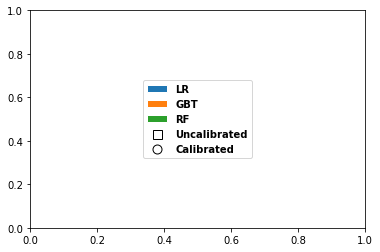

In [640]:

plt.figure();
legend_elements = [Patch(facecolor=lr_colors, edgecolor='w',
                         label='LR'),
                   Patch(facecolor=gbt_color, edgecolor='w',
                         label='GBT'),
                   Patch(facecolor=rf_color, edgecolor='w',
                         label='RF'),
                   Line2D([0], [0], marker='s', color='w', markeredgecolor='black', lw=4, alpha=1, label='Uncalibrated', 
                         markerfacecolor='w', markersize=9),
                   Line2D([0], [0], marker='o', color='w', markeredgecolor='black', lw=4, alpha=1, label='Calibrated',
                          markerfacecolor='w', markersize=9),
                  ]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, prop={'weight':'bold', 'size':10} )

15
15


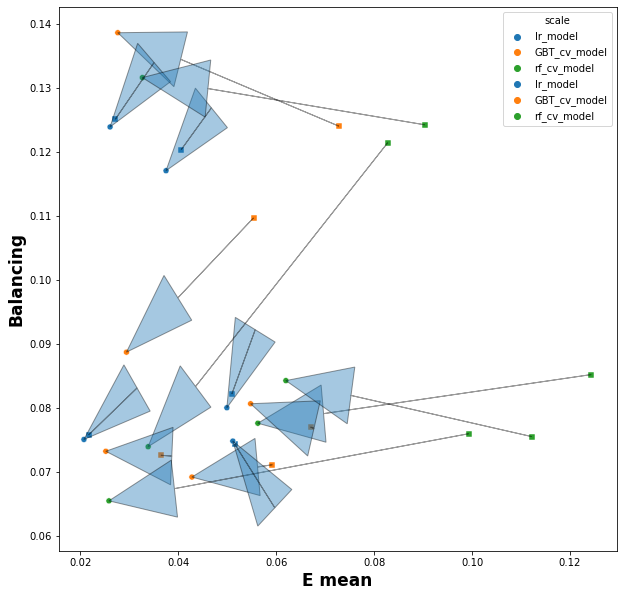

In [582]:
plot_comp_plot(df_42_nested_sig.query("scale != 'identity_model'"), metric='mean', y_metric='Balancing', y_label='Balancing')
plt.savefig('42_nested_sig_calib_balancing.jpg', dpi=300)

15
15


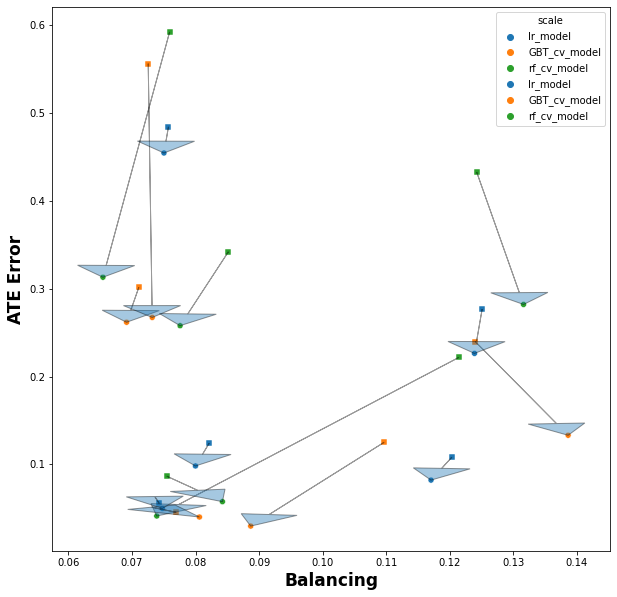

In [581]:
plot_comp_plot(df_42_nested_sig.query("scale != 'identity_model'"), metric='Balancing', x_label='Balancing')
plt.savefig('42_nested_sig_balancing.jpg', dpi=300)

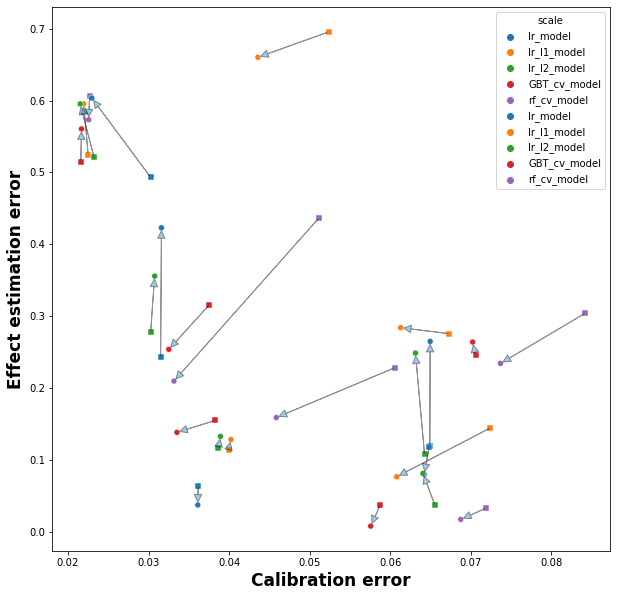

In [1052]:
a = plot_comp_plot(df_42_nested_sig_new.query("scale != 'identity_model'"), metric='mean')
# plt.savefig('42_nested_sig.jpg', dpi=300)

In [1040]:
a.get_children()[4]._facecolors

#.get_children()[1].get_children()[0].get_children()[0].get_children()[0].get_children()[0]._facecolors

array([[0.83921569, 0.15294118, 0.15686275, 1.        ]])

15
15
15
15


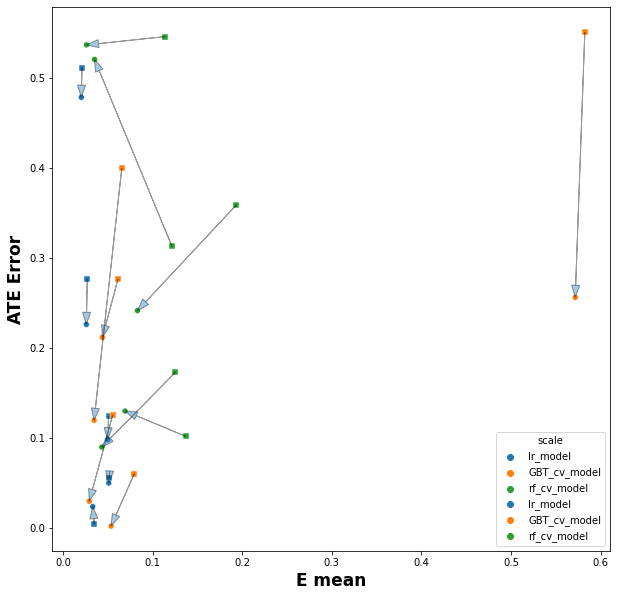

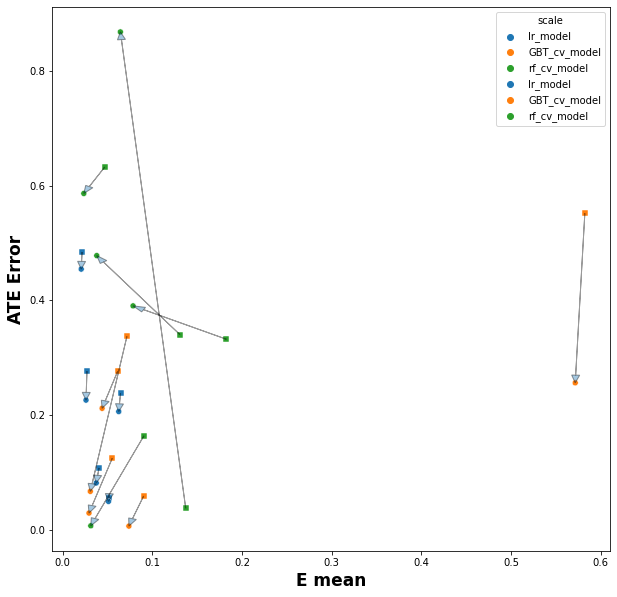

In [444]:
plot_comp_plot(df_42_nested_experiments_sig.loc[~df_42_nested_experiments_sig['type'].str.contains('identity')])
plot_comp_plot(df_4_experiments_sig.loc[~df_4_experiments_sig['type'].str.contains('identity')])


15
15


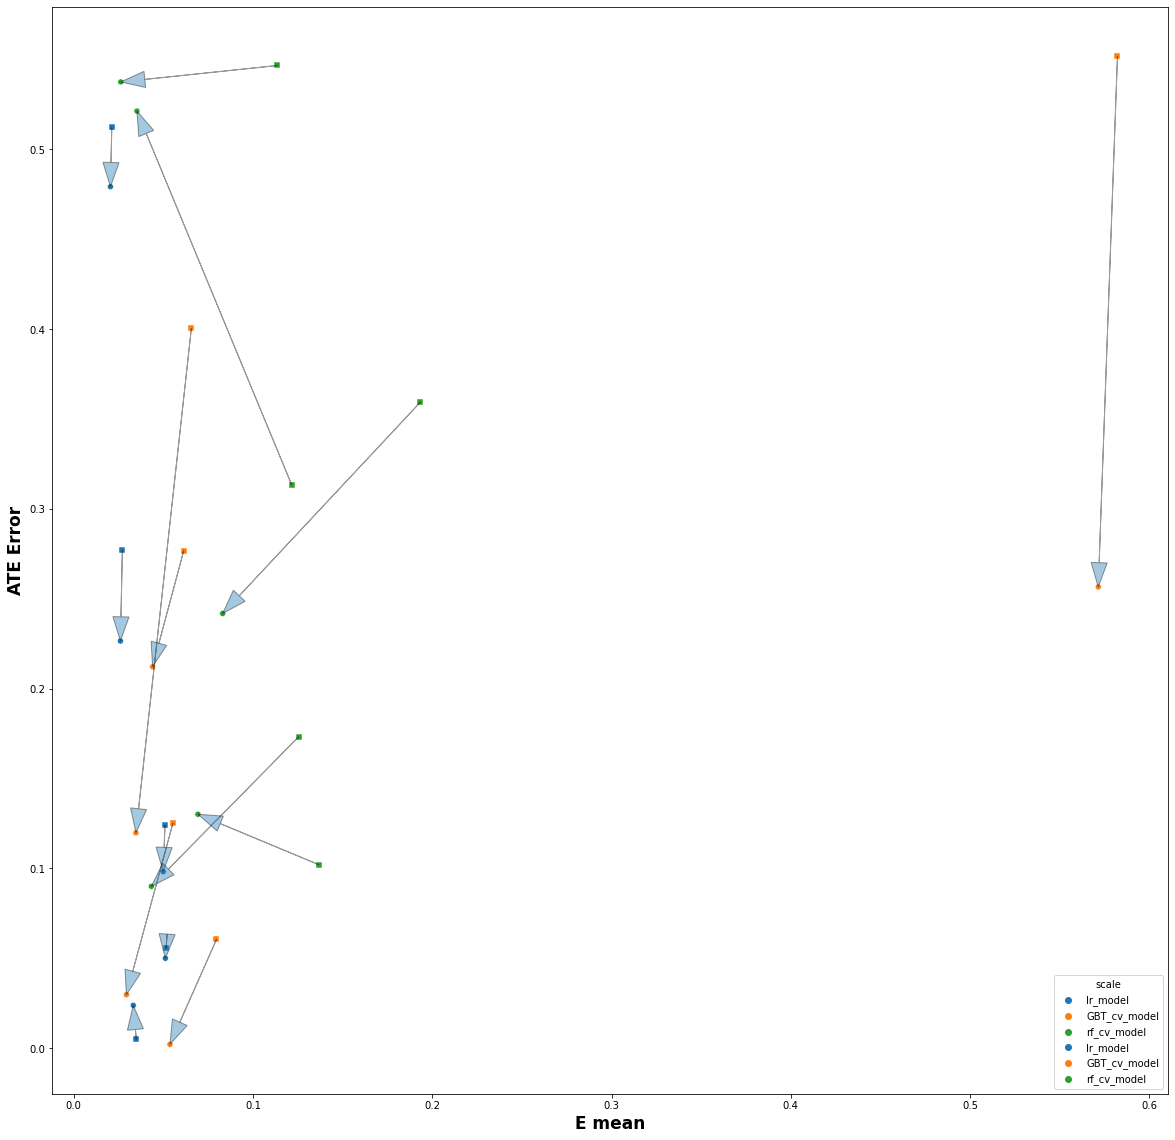

In [348]:
big_df = df_4_experiments_sig.loc[~df_4_experiments_sig['type'].str.contains('identity')]
plt.figure(figsize=(20,20))
for type_, marker in zip(['model', 'calibrated'], ['s', 'o']):
    mask = big_df['calibration_type'].isna() if type_ == 'model' else ~big_df['calibration_type'].isna()
    temp_df = big_df.loc[mask]
    print(temp_df.shape[0])
    sns.scatterplot(x='mean', y='ATE_error', data=temp_df, hue='scale', marker=marker)
temp_df = big_df
# plt.ylim(-0.01, 0.6)
# plt.xlim(-.01, 0.16)

plt.xlabel('E mean', fontdict={'weight': 'bold', 'size':17})
plt.ylabel('ATE Error', fontdict={'weight': 'bold', 'size':17})

arrows = utils.get_arrows(temp_df, calib_metric='mean')

arrows.apply(utils.plot_arrow);

# plt.save_fig('')

(0.05923578840709255, 0.3016059687789494) (0.0428035900579695, 0.26184157390497464)
(0.05096981636202825, 0.12416574882707376) (0.049943597063264074, 0.09820236948882322)
(0.12432158668173583, 0.3421502572448616) (0.05627071863848791, 0.257942778409332)
(0.05538246861342054, 0.12513825618947738) (0.029447674937661174, 0.029752220398176377)
(0.04061904001975273, 0.10825800328175239) (0.03752244618801777, 0.0821063425872639)
(0.08278705184815868, 0.22179417959296677) (0.03387181409469604, 0.04123193683729909)
(0.07280568736088695, 0.23987040778581692) (0.027675247019407316, 0.13313995444817284)
(0.027177364894346336, 0.27685273802051835) (0.026099396919411495, 0.22638210252602553)
(0.09031202455647147, 0.4329456640630083) (0.03269048187918971, 0.28209898401659084)
(0.03647737973916238, 0.5563858251134288) (0.025227079147418913, 0.26732697637893565)
(0.02172280127008047, 0.4843685392675514) (0.020766974903283174, 0.45455899469213357)
(0.09930923406183366, 0.5924385046113567) (0.0258714856

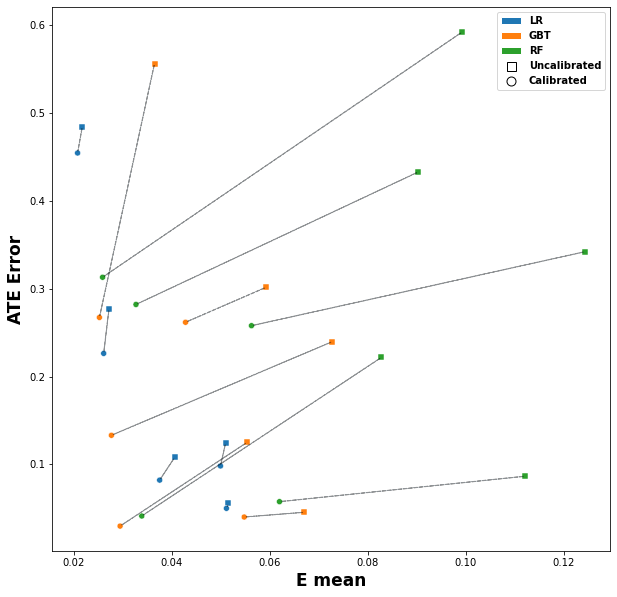

In [676]:
# fig = plt.figure(figsize=(4,4))
plot_comp_plot(df_42_nested_sig.query("scale != 'identity_model'"), metric='mean')

# arrows.apply(utils.plot_arrow, fig=fig);


In [75]:
import pickle
with open("models_test/acic42_2_new_sig.pkl", 'rb') as f:
    res_dict = pickle.load(f)

In [225]:
res_dict['models'].keys()

dict_keys(['lr_model', 'lr_l1_model', 'lr_l2_model', 'GBT_cv_model', 'rf_cv_model', 'identity_model'])

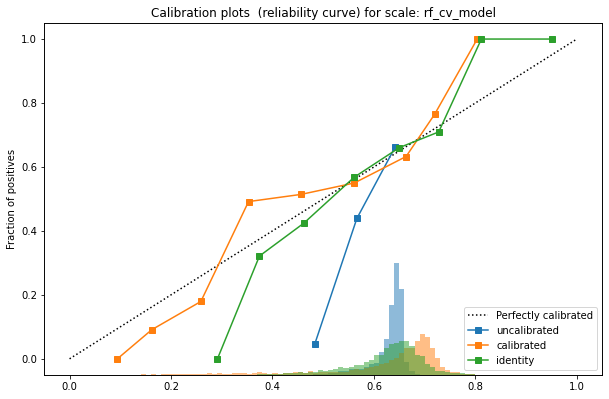

In [749]:
a = utils.plot_calibration_curve(res_dict, 'rf_cv_model')

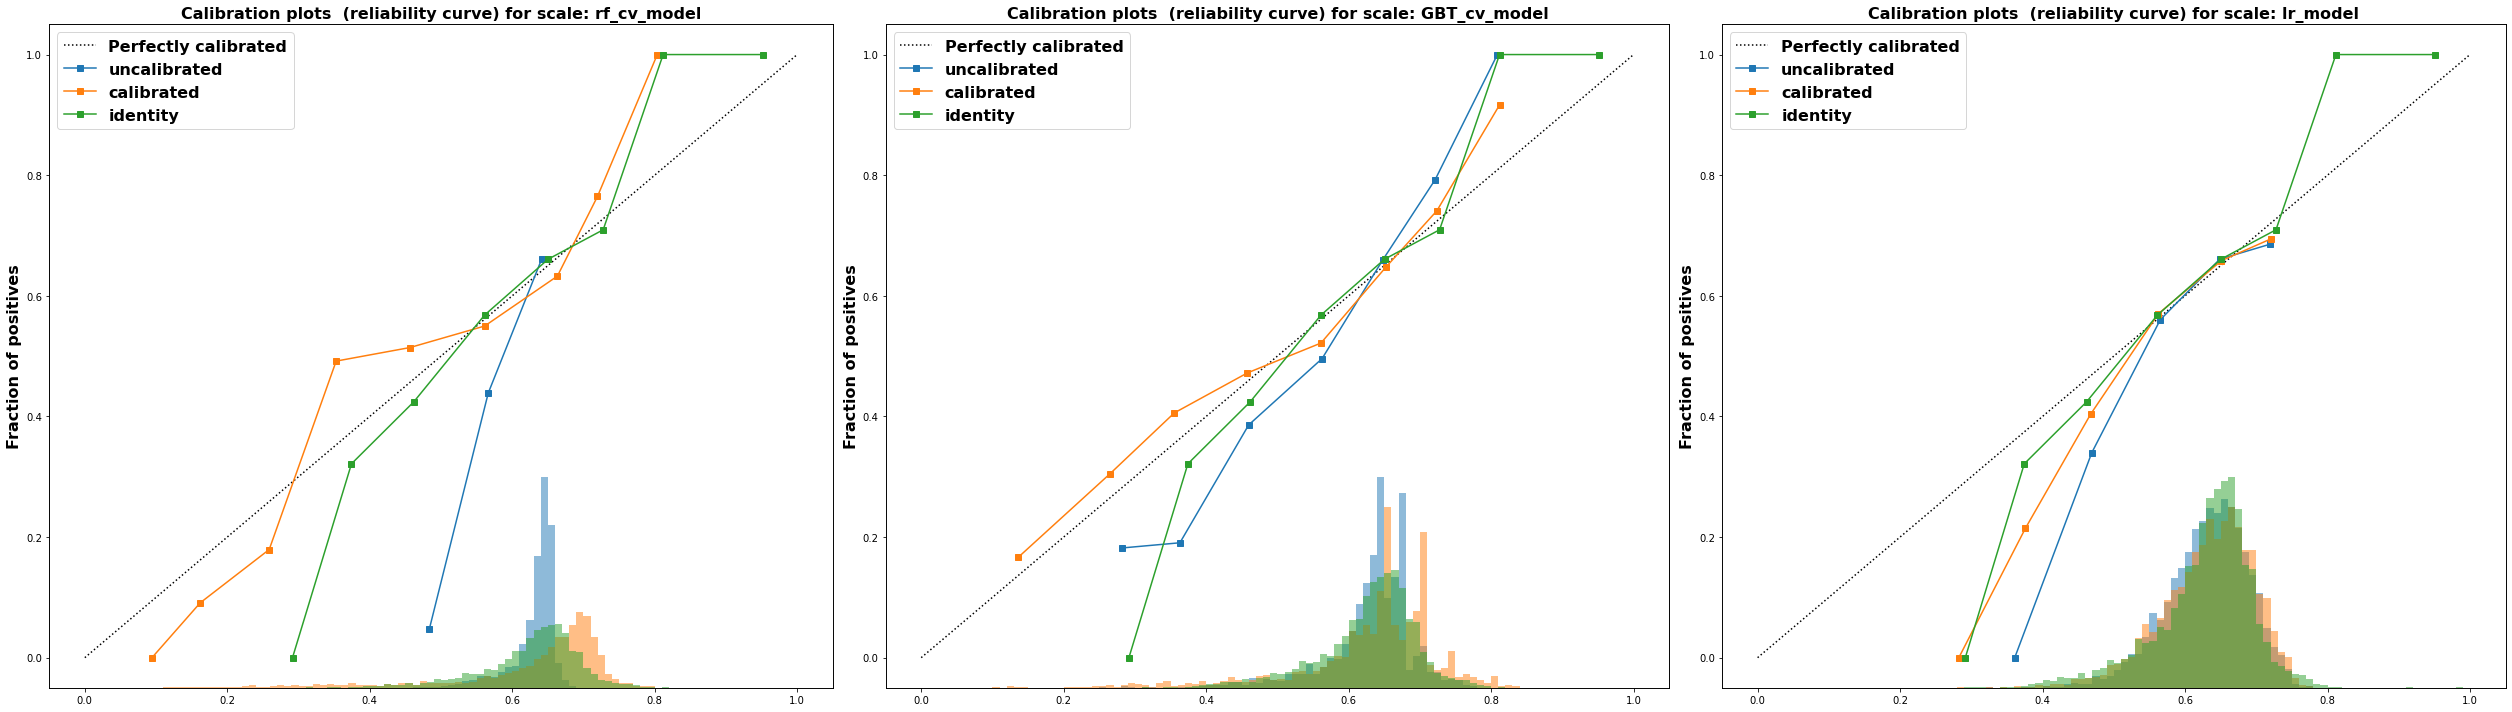

In [778]:
fig, axes = plt.subplots(1,3, figsize=(35, 10))
utils.plot_calibration_curve(res_dict, 'rf_cv_model', ax1=axes[0])
utils.plot_calibration_curve(res_dict, 'GBT_cv_model', ax1=axes[1])
utils.plot_calibration_curve(res_dict, 'lr_model', ax1=axes[2])

plt.tight_layout()
plt.savefig('calibration_acis.jpg', dpi=400)

In [230]:
res_dict['models']


{'lr_model': {'uncalibrated': array([0.63534625, 0.57970018, 0.67233702, ..., 0.50288335, 0.46417783,
         0.61795642]),
  'calibrated': array([0.63561946, 0.5950411 , 0.66160247, ..., 0.53693738, 0.5071721 ,
         0.62311443])},
 'lr_l1_model': {'uncalibrated': array([0.62751002, 0.59014397, 0.65762822, ..., 0.53369196, 0.48498467,
         0.63087695]),
  'calibrated': array([0.62907402, 0.59395875, 0.6564359 , ..., 0.53915055, 0.49103711,
         0.63217812])},
 'lr_l2_model': {'uncalibrated': array([0.61688823, 0.58411174, 0.64177425, ..., 0.51137087, 0.49185551,
         0.62629641]),
  'calibrated': array([0.61950242, 0.58898519, 0.64207193, ..., 0.51910189, 0.50010802,
         0.62810174])},
 'GBT_cv_model': {'uncalibrated': array([0.63193498, 0.62001811, 0.64426494, ..., 0.55712697, 0.41935599,
         0.66660569]),
  'calibrated': array([0.63331709, 0.61956451, 0.64732116, ..., 0.54426466, 0.3770806 ,
         0.67204931])},
 'rf_cv_model': {'uncalibrated': array([0.

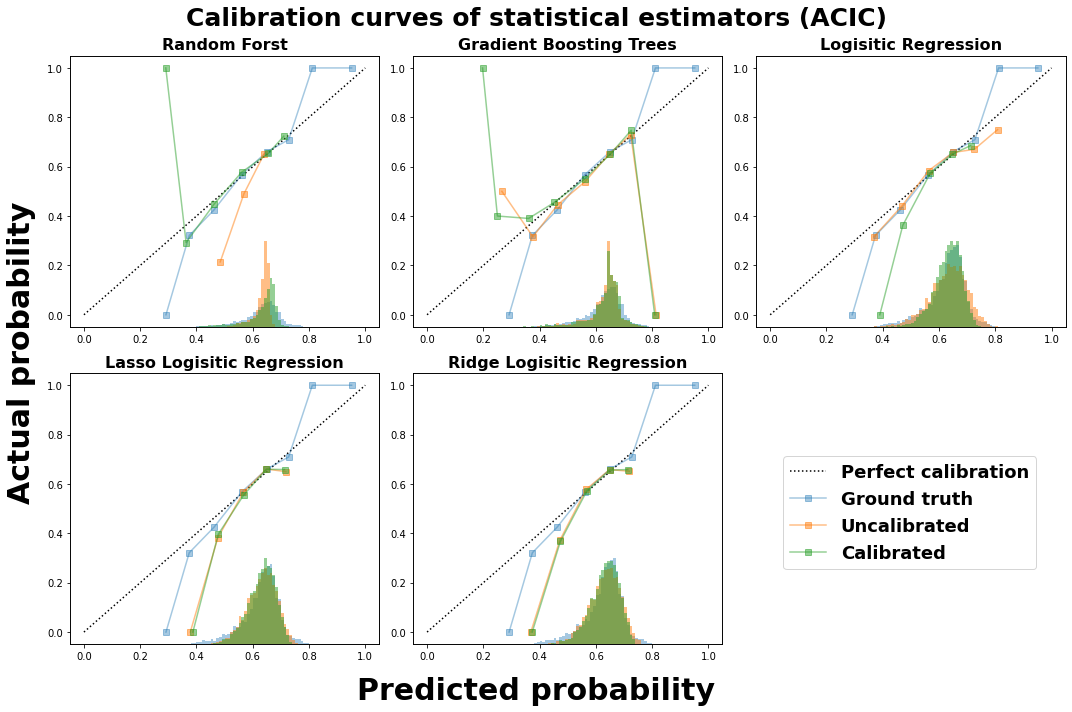

In [78]:
# fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(10,10))
# axes[0][1] = 
fig, axes = plt.subplots(2,3, figsize=(15, 10))
utils.plot_calibration_curve(res_dict, 'rf_cv_model', ax1=axes[0][0], model_name="Random Forst",
                             key_order=("Ground truth", "uncalibrated", "calibrated"))
utils.plot_calibration_curve(res_dict, 'GBT_cv_model', ax1=axes[0][1], model_name="Gradient Boosting Trees",
                            key_order=("Ground truth", "uncalibrated", "calibrated"))
utils.plot_calibration_curve(res_dict, 'lr_model', ax1=axes[0][2], model_name="Logisitic Regression",
                            key_order=("Ground truth", "uncalibrated", "calibrated"))
utils.plot_calibration_curve(res_dict, 'lr_l1_model', ax1=axes[1][0], model_name="Lasso Logisitic Regression",
                            key_order=("Ground truth", "uncalibrated", "calibrated"))
utils.plot_calibration_curve(res_dict, 'lr_l2_model', ax1=axes[1][1], model_name="Ridge Logisitic Regression",
                            key_order=("Ground truth", "uncalibrated", "calibrated"))
fig.supxlabel('Predicted probability', fontweight="bold", fontsize=30)
fig.supylabel('Actual probability', fontweight="bold", fontsize=30, x=0.01)
fig.suptitle("Calibration curves of statistical estimators (ACIC)", fontweight="bold", fontsize=25)


fig.legend(*axes[0][1].get_legend_handles_labels(), loc=(0.73, 0.2), prop={'weight': 'bold', 'size': 18})
for x in range(2):
    for y in range(3):
        if x == 1 and y == 2:
            continue
        axes[x][y].get_legend().remove()
axes[1][2].remove()
plt.tight_layout()

plt.savefig(os.path.join(cur_run_dir,'calibration_acic.jpg'), dpi=400)

In [235]:
outputs_dir

'/Users/romgutman/PycharmProjects/Propensity/outputs'

In [450]:
df_42_nested_experiments_sig.loc['42_2']

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,ATE_error
42_2,4802.0,0.034964,0.016046,0.000004,0.017021,0.036085,0.047560,0.244957,0.227602,lr,lr_model,None,3.560872,0.004923
42_2,4802.0,0.033266,0.013479,0.000166,0.017695,0.034701,0.045062,0.198845,0.227503,lr_calibrated,lr_model,sigmoid_calib,3.541959,0.023836
42_2,4802.0,0.055382,0.034616,0.000011,0.014928,0.045168,0.100552,0.236329,0.224040,GBT_cv,GBT_cv_model,None,3.690933,0.125138
42_2,4802.0,0.029448,0.020604,0.000002,0.001604,0.030272,0.051760,0.118060,0.222555,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,3.595547,0.029752
42_2,4802.0,0.125509,0.088337,0.000068,0.022692,0.115220,0.235694,0.676733,0.220049,rf_cv,rf_cv_model,None,3.738965,0.173170
42_2,4802.0,0.043356,0.035913,0.000001,0.009244,0.031859,0.095965,0.215514,0.205655,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.475794,0.090001
42_2,4802.0,0.040790,0.013869,0.000119,0.023753,0.043957,0.049675,0.181421,0.227222,identity,identity_model,None,3.620787,0.054992
42_2,4802.0,0.034522,0.010692,0.000077,0.020792,0.037375,0.041746,0.136400,0.227115,identity_calibrated,identity_model,sigmoid_calib,3.563773,0.002023


In [461]:
df_4_experiments_sig.loc['42_2']

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,ATE_error
42_2,4802.0,0.040615,0.023145,0.000055,0.013899,0.043453,0.056429,0.370160,0.228583,lr,lr_model,None,3.674049,0.108254
42_2,4802.0,0.037531,0.020873,0.000007,0.010617,0.040635,0.054664,0.303292,0.228405,lr_calibrated,lr_model,sigmoid_calib,3.647884,0.082089
42_2,4802.0,0.055382,0.034616,0.000011,0.014928,0.045168,0.100552,0.236329,0.224040,GBT_cv,GBT_cv_model,None,3.690933,0.125138
42_2,4802.0,0.029448,0.020604,0.000002,0.001604,0.030272,0.051760,0.118060,0.222555,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,3.595547,0.029752
42_2,4802.0,0.090673,0.062694,0.000012,0.018560,0.081854,0.162936,0.526184,0.220419,rf_cv,rf_cv_model,None,3.730050,0.164255
42_2,4802.0,0.031449,0.026502,0.000007,0.003186,0.027494,0.069289,0.122739,0.213799,rf_cv_calibrated,rf_cv_model,sigmoid_calib,3.573394,0.007599
42_2,4802.0,0.040790,0.013869,0.000119,0.023753,0.043957,0.049675,0.181421,0.227222,identity,identity_model,None,3.620787,0.054992
42_2,4802.0,0.034522,0.010692,0.000077,0.020792,0.037375,0.041746,0.136400,0.227115,identity_calibrated,identity_model,sigmoid_calib,3.563773,0.002023


In [148]:
# np.where(t_temp == 1, )



array([0.51437104, 0.25924421, 0.2887585 , ..., 0.1826718 , 0.32126219,
       0.1660818 ])

In [151]:
def plot_overlap(t, prop):
    fig = plt.figure(figsize=(10, 10))
    plt.hist(prop[t == 1], bins=20, color='cornflowerblue', alpha=0.7, label= 'Treated');
    plt.hist(prop[t == 0], bins=20, color='red', alpha=0.7, label= 'Control');

    plt.legend();
    

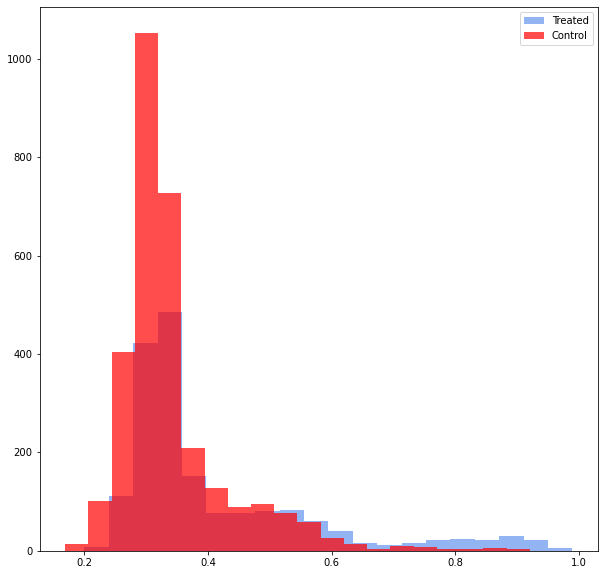

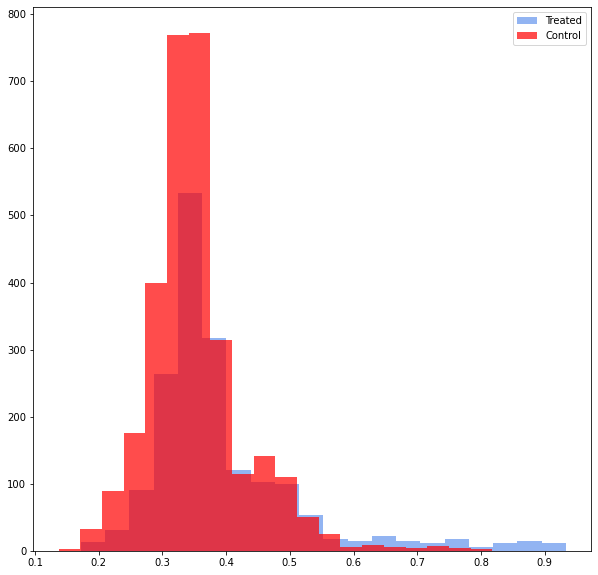

In [389]:
plot_overlap(res_dict['t'].values, res_dict['models']['rf_cv_model']['calibrated'])
plot_overlap(res_dict['t'].values, res_dict['models']['identity_model']['calibrated'])

In [494]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

cv_inner = KFold(n_splits=5, shuffle=True, random_state=2408)
model = RandomForestClassifier(random_state=42, oob_score=True)


search = GridSearchCV(model, tuned_parameters, scoring=scores, n_jobs=-1, cv=cv_inner, refit=True)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=2408)

final_score = cross_val_predict(search, x_acic, instance_df['z'], cv = cv_outer, n_jobs=-1, method='predict_proba')


(array([   3.,   10.,   19.,   72.,  153.,  277.,  646., 1968., 1603.,
          51.]),
 array([0.36531737, 0.40133854, 0.4373597 , 0.47338087, 0.50940204,
        0.5454232 , 0.58144437, 0.61746553, 0.6534867 , 0.68950786,
        0.72552903]),
 <BarContainer object of 10 artists>)

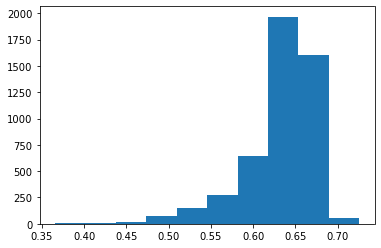

In [495]:
plt.hist(final_score[:,1])

In [497]:
e_temp = final_score[:, 1]
t_temp = instance_df['z']
y_temp = np.where(t_temp == 1, po[1], po[0])


In [435]:
ate_hat_temp = utils.calc_ipw(y_temp, t_temp, e_temp)

In [436]:
utils.generate_calib_error_df(
    t_temp,
    e_temp,
    id_,
    type_='rf_cv',
    scale='rf_cv_model'
)

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type
4_2,4802.0,0.122127,0.027313,0.000564,0.085268,0.134077,0.138429,0.156526,0.215541,rf_cv,rf_cv_model,None


In [437]:
ate_hat_temp

5.734891632924311

In [438]:
ate

4.928752399143661

In [439]:
e_calib_temp = utils.sigmoid_calib(e_temp, t_temp)

utils.calc_ipw(y_temp, t_temp, e_calib_temp)

5.71264408762999

In [440]:
utils.generate_calib_error_df(
    t_temp,
    e_calib_temp,
    id_,
    type_='rf_cv',
    scale='rf_cv_model'
)

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type
4_2,4802.0,0.12277,0.02561,0.000788,0.090577,0.133201,0.140659,0.143968,0.215476,rf_cv,rf_cv_model,None


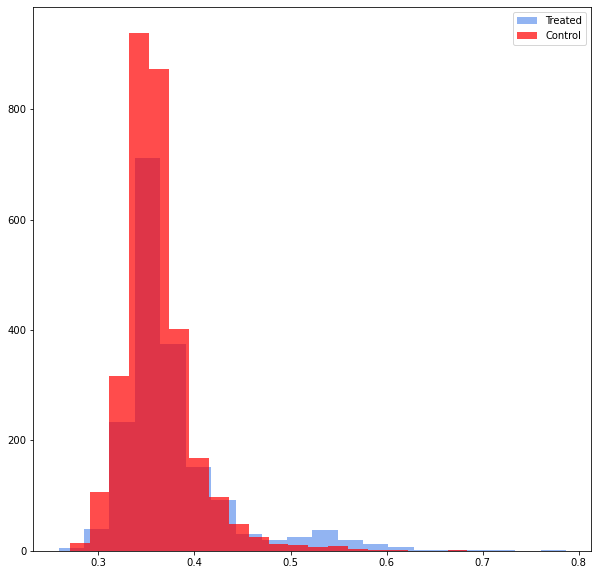

In [312]:
utils.plot_overlap(instance_df['z'], final_score[:, 1])

In [508]:
from causallib.evaluation.weight_evaluator import calculate_covariate_balance
smd = calculate_covariate_balance(x_acic, t_temp.reset_index(drop=True), pd.Series(e_temp), metric="abs_smd")

smd['weighted'].max()

abs_smd,weighted,unweighted
covariate,,
x_1,0.044346,0.046221
x_3,0.003796,0.005509
x_4,0.016661,0.016253
x_5,0.005809,0.003873
x_6,0.032528,0.035059
...,...,...
x_21_P,0.028763,0.029351
x_24_B,0.061930,0.069531
x_24_C,0.004188,0.004321


In [685]:
df_42_nested_sig.to_csv('final_42_df.csv')

In [502]:
x_acic.shape

(4802, 79)

In [505]:
e_temp

array([0.63976923, 0.58981398, 0.65459509, ..., 0.52561798, 0.42208944,
       0.63321225])

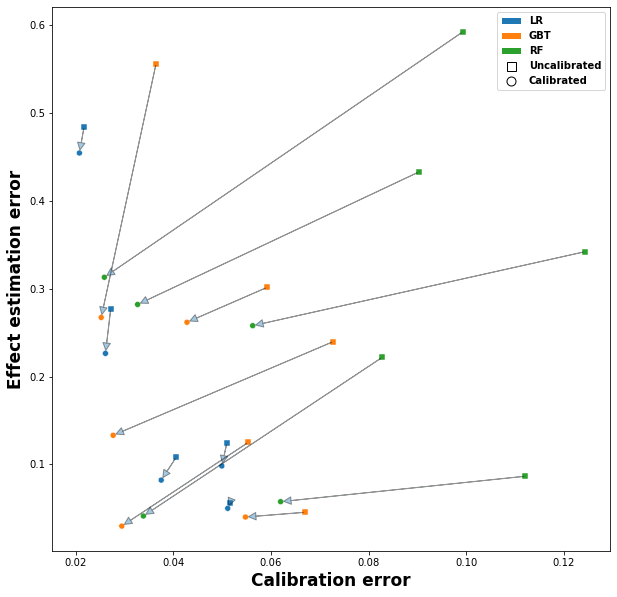

In [991]:
plot_comp_plot(df_42_nested_sig.query("scale != 'identity_model'"), metric='mean')

plt.savefig('calib_ate_acic.jpg', dpi=400)
# a.get_patches()

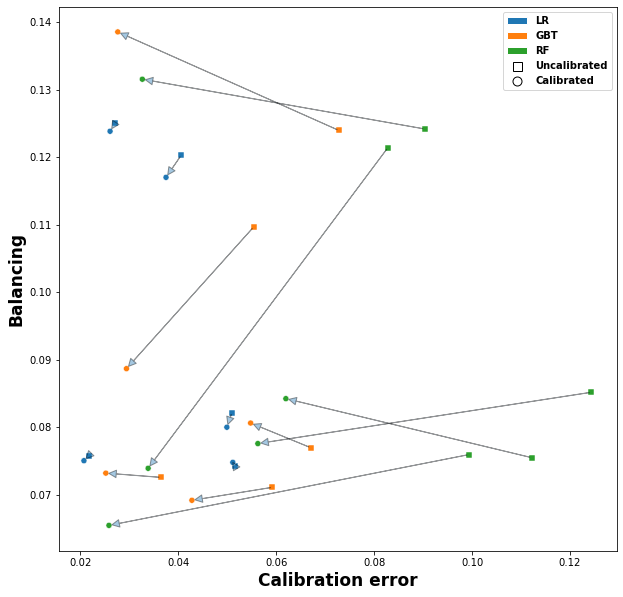

In [992]:
plot_comp_plot(df_42_nested_sig.query("scale != 'identity_model'"), metric='mean', y_metric='Balancing', y_label='Balancing')

plt.savefig('calib_balancing_acic.jpg', dpi=400)


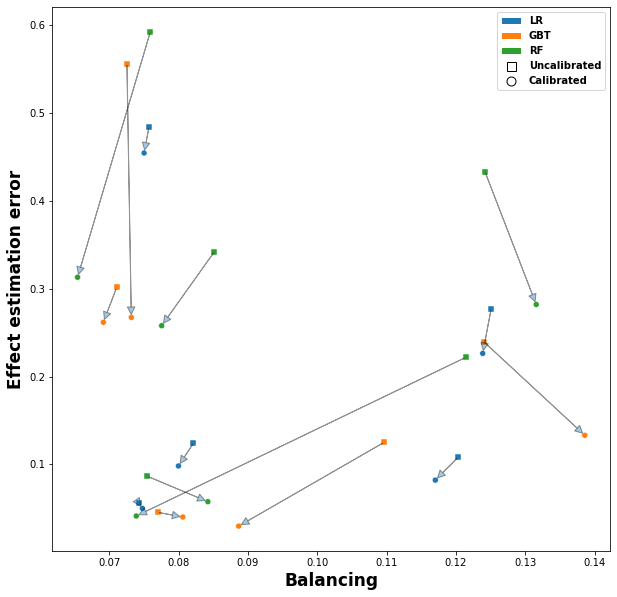

In [993]:
plot_comp_plot(df_42_nested_sig.query("scale != 'identity_model'"), metric='Balancing', x_label='Balancing')

plt.savefig('balancing_ate_acic.jpg', dpi=400)


In [1080]:
run_types = {'Nested': 'new_sig', 
             'Non-Nested': 'sig'
            }


for name, suffix in run_types.items():
    print(f'For {name} run:')
    for i in range(1,6):
        with open(f'models_test/acic42_{i}_{suffix}.pkl', 'rb') as file:
            new_res = pickle.load(file)
        t_inner_temp = new_res['t']
        models_inner = new_res['models']['GBT_cv_model']
        print(f'\t{i}: Uncalibrated: {roc_auc_score(t_inner_temp, models_inner["uncalibrated"]):.2%}, Callibrated: {roc_auc_score(t_inner_temp, models_inner["calibrated"]):.2%}')

For Nested run:
	1: Uncalibrated: 54.79%, Callibrated: 54.79%
	2: Uncalibrated: 57.24%, Callibrated: 57.24%
	3: Uncalibrated: 57.14%, Callibrated: 57.14%
	4: Uncalibrated: 50.55%, Callibrated: 50.55%
	5: Uncalibrated: 52.63%, Callibrated: 52.63%
For Non-Nested run:
	1: Uncalibrated: 59.96%, Callibrated: 59.96%
	2: Uncalibrated: 61.51%, Callibrated: 61.51%
	3: Uncalibrated: 66.82%, Callibrated: 66.82%
	4: Uncalibrated: 54.12%, Callibrated: 54.12%
	5: Uncalibrated: 57.94%, Callibrated: 57.94%


In [1071]:
with open('models_test/acic42_1_new_sig.pkl', 'rb') as file:
    new_res = pickle.load(file)
    

roc_auc_score(new_res['t'], new_res['models']['GBT_cv_model']['uncalibrated'])
roc_auc_score(new_res['t'], new_res['models']['GBT_cv_model']['calibrated'])

In [1073]:
from sklearn.metrics import roc_auc_score

roc_auc_score(new_res['t'], new_res['models']['GBT_cv_model']['uncalibrated'])

0.5478993261062479

In [1066]:
with open('models_test/acic42_1_sig.pkl', 'rb') as file:
    new_res = pickle.load(file)

{'t': 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 4797    0
 4798    0
 4799    1
 4800    1
 4801    1
 Name: z, Length: 4802, dtype: int64,
 'prop': 0       0.686039
 1       0.672264
 2       0.655583
 3       0.637635
 4       0.628436
           ...   
 4797    0.675788
 4798    0.677884
 4799    0.709761
 4800    0.699837
 4801    0.647685
 Name: e, Length: 4802, dtype: float64,
 'models': {'lr_model': {'uncalibrated': array([0.67449943, 0.61747775, 0.64984876, ..., 0.66013559, 0.58485815,
          0.71046885]),
   'calibrated': array([0.66985836, 0.64592269, 0.65960985, ..., 0.66390546, 0.63188435,
          0.68452576])},
  'lr_l1_model': {'uncalibrated': array([0.6201164 , 0.63242533, 0.65818427, ..., 0.64687341, 0.62475301,
          0.71687746]),
   'calibrated': array([0.65116403, 0.65576764, 0.66530681, ..., 0.66113418, 0.65290152,
          0.68653592])},
  'lr_l2_model': {'uncalibrated': array([0.64905611, 0.62097485, 0.63956713, ..., 0.65033524, 0

In [87]:
df_sig_new = pd.read_csv("nested_sig_with_lr.csv", index_col=[0])

df_sig_new

,count,mean,std,min,10%,50%,90%,max,brier,type,scale,calibration_type,ATE,Balancing,ATE_error
42_1,4802.0,0.053295,0.013802,8.267988e-05,0.032862,0.058660,0.063284,0.107428,0.219734,lr,lr_model,NaN,2.757498,0.083234,0.196387
42_1,4802.0,0.053132,0.012733,1.051622e-04,0.034982,0.058344,0.061694,0.076321,0.219715,lr_calibrated,lr_model,sigmoid_calib,2.744139,0.082301,0.183028
42_1,4802.0,0.085051,0.032983,9.070506e-05,0.057398,0.072184,0.131013,0.245093,0.223617,lr_l1,lr_l1_model,NaN,3.087600,0.093895,0.526489
42_1,4802.0,0.073180,0.011129,5.953571e-02,0.060676,0.072409,0.089627,0.129671,0.222452,lr_l1_calibrated,lr_l1_model,sigmoid_calib,2.896370,0.093004,0.335259
42_1,4802.0,0.050970,0.013049,1.301793e-05,0.037738,0.055054,0.060558,0.195735,0.218909,lr_l2,lr_l2_model,NaN,2.685277,0.082150,0.124166
42_1,4802.0,0.049944,0.010039,1.022596e-04,0.044491,0.052575,0.056236,0.153461,0.218856,lr_l2_calibrated,lr_l2_model,sigmoid_calib,2.659313,0.079989,0.098202
42_1,4802.0,0.059236,0.041590,3.522276e-04,0.007457,0.061128,0.116709,0.189434,0.217437,GBT_cv,GBT_cv_model,NaN,2.862717,0.071081,0.301606
42_1,4802.0,0.042804,0.032842,2.627723e-05,0.001408,0.050018,0.089777,0.124537,0.216347,GBT_cv_calibrated,GBT_cv_model,sigmoid_calib,2.822953,0.069156,0.261842
42_1,4802.0,0.124322,0.086252,5.928428e-05,0.027367,0.113334,0.240145,0.556343,0.218033,rf_cv,rf_cv_model,NaN,2.903261,0.085169,0.342150
42_1,4802.0,0.056271,0.038655,1.623310e-05,0.018546,0.047518,0.111769,0.223816,0.205875,rf_cv_calibrated,rf_cv_model,sigmoid_calib,2.819054,0.077568,0.257943


In [20]:
display(get_slopes(df_sig_new.query("scale != 'identity_model'")))
display(get_slopes(df_sig_new.query("scale != 'identity_model'"),x_metric='mean', y_metric='Balancing'))
display(get_slopes(df_sig_new.query("scale != 'identity_model'"),x_metric='Balancing'))


NameError: name 'get_slopes' is not defined

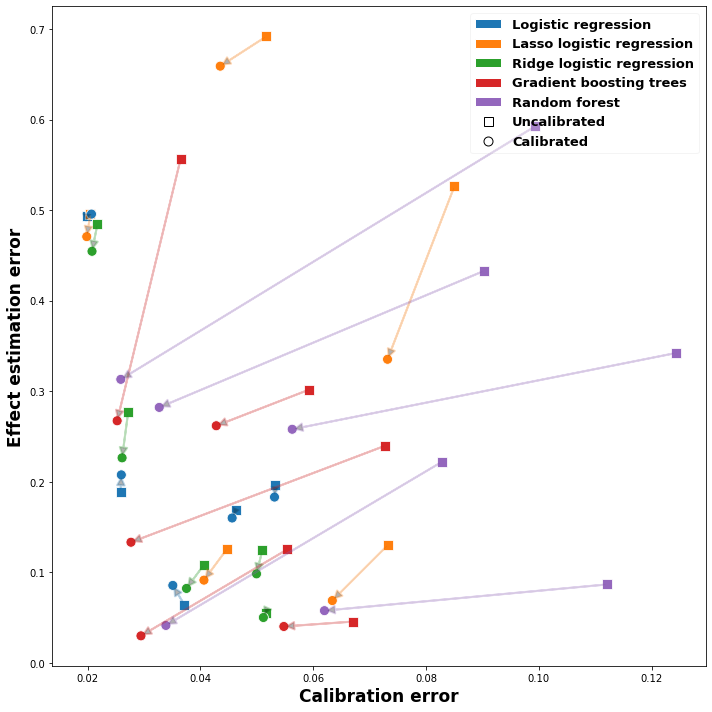

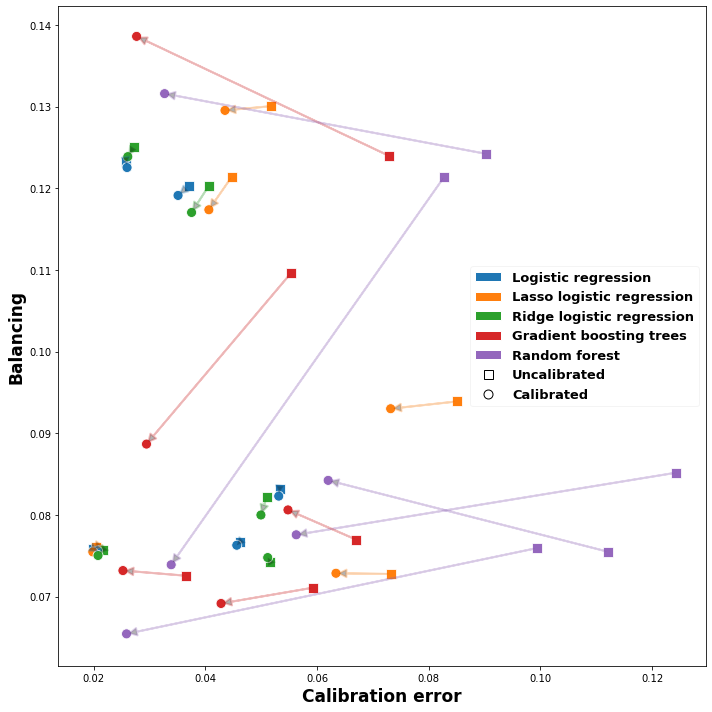

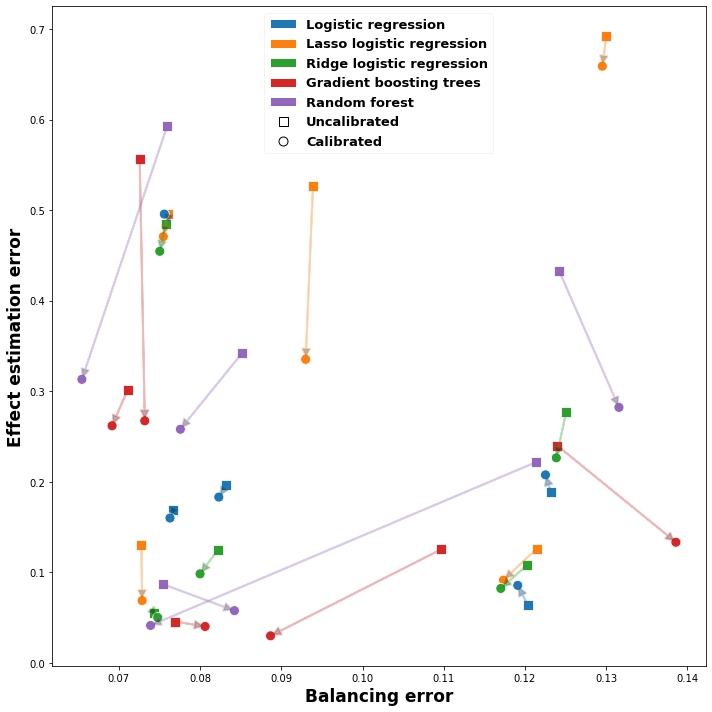

In [92]:
force_names = ['Logistic Regression', 'Lasso Logistic Regression', 'Ridge Logistic Regression',
               "Gradient Boosting Trees", "Random Forest" ]
utils.plot_comp_plot(df_sig_new.query("scale != 'identity_model'"), x_label=r"Calibration error",
               plot_legend=True, force_names=force_names, color_edges=True)
# plt.

plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir, 'acic_models_calibration_ate.jpg'), dpi=400)

utils.plot_comp_plot(df_sig_new.query("scale != 'identity_model'"), y_metric='Balancing',
               y_label='Balancing', x_label=r"Calibration error",
               plot_legend=True, force_names=force_names, color_edges=True)
plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir, 'acic_models_calibration_balancing.jpg'), dpi=400)


utils.plot_comp_plot(df_sig_new.query("scale != 'identity_model'"), metric='Balancing', x_label='Balancing error',
               plot_legend=True, force_names=force_names, color_edges=True)
plt.tight_layout()
plt.savefig(os.path.join(cur_run_dir, 'acis_models_balancing_ate.jpg'), dpi=400)


In [88]:
# ax7.get_children()[-2].__dict__
# fig, ax = plt.subplots(1,1)

# ax = ax7

# plt.gca().lines[-1].get_color()
ax7.get_children()[0]._facecolors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098,

In [90]:
# lr_colors = [0.12156863, 0.46666667, 0.70588235, 1.]
# gbt_color = [1., 0.49803922, 0.05490196, 1.]
# rf_color = [0.17254902, 0.62745098, 0.17254902, 1.]

df_sig_new.query("scale != 'identity_model'")['scale'].unique()

array(['lr_model', 'lr_l1_model', 'lr_l2_model', 'GBT_cv_model',
       'rf_cv_model'], dtype=object)

In [93]:
names = df_sig_new.query("scale != 'identity_model'")['scale'].unique()
colors = ax7.get_children()[0]._facecolors[:names.shape[0]]
[Patch(facecolor=fc, edgecolor='w', label=name.replace("_model", "")) 
 for fc, name in zip(colors, names)]
# colors

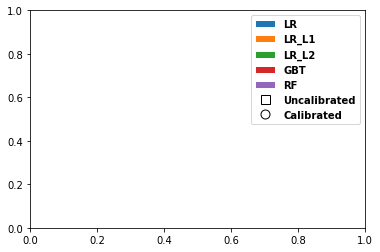

In [97]:
plt.figure()

names = df_sig_new.query("scale != 'identity_model'")['scale'].unique()
colors = ax7.get_children()[0]._facecolors[:names.shape[0]]
legend_elements = [Patch(facecolor=fc, edgecolor='w', label=name.replace("_model", "").replace("_cv", "").upper()) 
 for fc, name in zip(colors, names)]

legend_elements.extend([
    Line2D([0], [0], marker='s', color='w', markeredgecolor='black', lw=4, alpha=1, label='Uncalibrated', 
           markerfacecolor='w', markersize=9),
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', lw=4, alpha=1, label='Calibrated',
           markerfacecolor='w', markersize=9),
]
)
plt.legend(handles=legend_elements, prop={'weight':'bold', 'size':10} )